Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "Aditya Jabade"

---

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Abstract
* Introduction and Problem Description
* Brief discussion of Computational approach and import of any additional packages
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Abstract [10 pts]

Provide a 1-2 paragraph abstract of the project in the style of a research paper.  The abstract should contain

* A brief description of the problem
* A brief justification describing why this problem is important/interesting to you
* A general description of the computational approach
* A brief summary of what you did and what you learned


&nbsp; The mathematical model of the carbon cycle proposed by Eriksson and Welander concerns the dynamic interactions between various carbon reservoirs in the Earth's system, such as the atmosphere, ocean, and biosphere. The model aims to quantify the exchange processes and feedback mechanisms that govern the flow of carbon, providing insights into the possibility of self-sustained oscillations and their implications for long-term environmental changes. Reproducing this model is crucial to validate its assumptions, propositions and results under contemporary computational frameworks. This project aimed to faithfully reproduce the results presented in the original study, motivated by a personal interest in mathematical modeling and its applications to diverse fields, including tackling pressing global challenges such as climate change. This interest was sparked by reading Steve Strogatz's book on Nonlinear Dynamics, which inspired my curiosity about the nonlinear nature of the world around us. This curiosity led me to explore the history of Chaos Theory, where I encountered Lorenz, the Butterfly Effect, and resources on climate modeling. I chose this topic because reproducing the carbon-cycle model involved investigating key concepts such as stability and oscillations, which are critical for solving scientific problems in a real-world context. Additionally, it provided an opportunity to apply computational tools to an impactful and meaningful topic directly related to the environment and climate change.\
&nbsp; The reproduction involved implementing the model equations using Python-based ODE solvers to simulate system dynamics. Parameter values and initial conditions were extracted from the original study, with additional analyses conducted to test stability of the model using eigenvalues of its linearised version. The results closely aligned with the findings of Eriksson and Welander, confirming the predicted cyclic behavior under certain parameter regimes. The key takeaway from this project was the accomplishment of having reproduced a research paper. I learned how to formally investigate the propositions presented in a technical document and conduct additional analyses to test their validity. This was particularly relevant in the context of analyzing the stability of fixed points, where visualizing the trajectories of the nonlinear system for various initial conditions aligned with the inferences drawn from the eigenvalues of the linearized system. Furthermore this exercise provided me practical experience with ODE solving, root-finding and stability analysis methods, enhancing my understanding of these computational techniques and how they apply to dynamical systems.   

## Introduction [15 pts]

In ~4-5 paragraphs, describe 
* The general problem you want to solve
* Why it is important and what you hope to achieve.

Please provide basic **references**, particularly if you are reproducing results from a paper. Also include any basic equations you plan to solve. 

Please use proper spelling and grammar. 

This project aims to reproduce and validate the mathematical model of the carbon cycle presented by Eriksson and Welander (1955) in their paper titled "*On a Mathematical Model of the Carbon Cycle in Nature*" [1], which describes the $CO_2$ interactions between the atmosphere, biosphere, and oceans. The paper, and consequently this project, focuses on simulating the dynamic behavior of carbon concentration changes under varying conditions, like natural oscillations and external $CO_2$ inputs from fossil fuel combustion. The objective is to explore the stability of these systems, investigate the possibility of oscillations, and determine how compatible the model's results are with observed atmospheric $CO_2$ trends. 

The carbon cycle model formulated in [1] exclusively accounts for the following processes:
1. Assimilation of carbon by terrestrial plants
2. Production of $CO_2$ by terrestrial plants via respiration
3. Transition of living organic material to dead organic material
4. Decay of dead organic material to $CO_2$
5. $CO_2$ exchange between atmosphere and oceans 

A four-block diagram is constructed in [1] to represent the storage of $CO_2$ in the atmosphere and its transfer resulting from the aforementioned processes.The generalized time-evolution of this four-block is given below. Here $f$ and $g$ represent interactions between the blocks $x_l$-$y_a$ and $x_l$-$x_d$ respectively. The nature and properties of these functions are discussed at length in [1]. The generalised model is simplified making an appropriate choice of $f$ and $g$ as discussed later.
$$
\begin{aligned}
    \begin{array}{l}
        \frac{dx_l}{dt} = f(x_l, y_a) \\[8pt]
        \frac{dx_d}{dt} = g(x_l, x_d) \\[8pt]
        \frac{dy_s}{dt} = k_4(y_a - k_5 y_s) \\[8pt]
        a = x_l + x_d + y_a + y_s
    \end{array}
    % \Biggl\} 
    \quad
    \begin{array}{|c|l|}
        \hline
        \text{Component} & \text{Meaning} \\ \hline
        \text{$x_l$} & \text{Mass of assimilating plants} \\ \hline
        \text{$x_d$} & \text{Mass of dead organic matter} \\ \hline
        \text{$y_a$} & \text{Amount of $CO_2$ in atmosphere} \\ \hline
        \text{$y_s$} & \text{Amount of $CO_2$ in sea} \\ \hline
        \text{$a$} & \text{Total amount of $CO_2$ in the carbon cycle} \\ \hline
        \text{$f, g$} & \text{Interaction functions} \\ \hline
        \text{$k_{4}, k_{5}$} & \text{Parameters} \\ \hline
    \end{array}
\end{aligned}
$$

It is argued in [1] that the if the inequality given below holds, the sea cannot cause instability in the system but merely will have a damping effect. This is referred throughout this document as 'Sea Instability condition'(SIC).
$$
\begin{aligned}
    (k_{4}-\alpha-\delta)[\alpha\delta-\beta\gamma+k_{4}(\beta-\alpha-\delta)]-k_{4}\delta(\alpha-\beta) &> 0 \\[8pt]
    \alpha &= \frac{\partial f}{x_{1}} \\[8pt]
    \beta &= \frac{\partial f}{y_{s}} = \frac{\partial f}{x_{d}} \\[8pt]
    \gamma &= \frac{\partial g}{x_{1}} \\[8pt]
    \delta &= \frac{\partial g}{x_{d}} \\[8pt]
\end{aligned}
$$

A choice of $f(x_{l},y_{a})$ and $g(x_{l},x_{d})$ is made and the following model is obtained. Further in this document this model is referred as the 'Complete Model without Time delay (M1)'.

$$
\begin{aligned}
    \frac{dx_l}{dt} &= k_{1}x_{l}y_{a}-k_{2}x_{l} \\[8pt]
    \frac{dx_d}{dt} &= k_{2}x_{l} - k_{3}x_{d} \\[8pt]
    \frac{dy_s}{dt} &= k_4(y_a - k_5 y_s) \\[8pt]
    x_l + x_d + y_a + y_s &= a
\end{aligned}
$$

The model is further modified to incorporate time delays in the biosphere. Primarily [1] argues that the $CO_{2}$ assimilated by trees is not available for decay/transfer until the trees die. Hence the rate of transition of $CO_{2}$ would be a function of the amount of living matter a few years earlier. Given below is the modified model with $\tau$ the characteristic delay time. Further in this document this model is referred as the 'Complete Model with Time delay (M2)'. [1] uses this model (M2) for numerical computation along with a few modified versions described below.
$$
\begin{aligned}
    \frac{dx_l}{dt} &= k_{1}x_{l}y_{a}-k_{2}x_{l}^{*} \\[8pt]
    \frac{dx_d}{dt} &= k_{2}x_{l}^{*} - k_{3}x_{d} \\[8pt]
    \frac{dy_s}{dt} &= k_4(y_a - k_5 y_s) \\[8pt]
    \frac{dx_{l}^{*}}{dt} &= \frac{1}{\tau}(x_{l} - x_{l}^{*}) \\[8pt]
    x_l + x_d + y_a + y_s &= a 
\end{aligned}
$$
The first modification is honestly a simplified verison of M2, which discounts the effect of sea ($y_s$). This is referred throughout this document as the 'Partial Model with Time delay (M2_sub)'. The rationale behind constructing this model is eluicdated at length in [1] and is briefly touched in the $k_{4}$ inequality above. The numerical validation of this rationale is carried out in this project. Following is the time-evolution representation of M2_sub:
$$
\begin{aligned}
    \frac{dx_l}{dt} &= k_{1}x_{l}y_{a}-k_{2}x_{l}^{*} \\[8pt]
    \frac{dx_d}{dt} &= k_{2}x_{l}^{*} - k_{3}x_{d} \\[8pt]
    \frac{dx_{l}^{*}}{dt} &= \frac{1}{\tau}(x_{l} - x_{l}^{*}) \\[8pt]
    x_l + x_d + y_a &= a
\end{aligned}
$$
It is argued in [1] that the if the inequality given below holds, the system (M2_sub) will be stable without any natural oscillations. A corresponding numerical validation is carried out in this project. This is referred throughout this document as 'M2_sub Oscillation threshold' (M2_sub OT).
$$
\det\begin{vmatrix}
\frac{1}{\tau}-\alpha-\gamma-\delta & \frac{1}{\tau}(\alpha\delta-\beta\gamma) \\
1 & \frac{-1}{\tau}(\alpha+\delta)+(\alpha+\gamma)\delta
\end{vmatrix} > 0
$$

The second modification involves a more realistic formulation of M2 where the total amount of $CO_{2}$ is not a constant, but a linear function of time with the contributor source being combustion of fossil carbon. This is referred throughout this document as 'Advanced Complete Model with Time delay (M2_pro)'. Following is the time-evolution representation of M2_pro: 
$$
\begin{aligned}
    \frac{dx_l}{dt} &= k_{1}x_{l}y_{a}-k_{2}x_{l}^{*} \\[8pt]
    \frac{dx_d}{dt} &= k_{2}x_{l}^{*} - k_{3}x_{d} \\[8pt]
    \frac{dy_s}{dt} &= k_4(y_a - k_5 y_s) \\[8pt]
    \frac{dx_{l}^{*}}{dt} &= \frac{1}{\tau}(x_{l} - x_{l}^{*}) \\[8pt]
    x_l + x_d + y_a + y_s &= a(t) \\[8pt]
    a(t) &= a(0) + qt
\end{aligned}
$$


### References

YOUR ANSWER \
[1]: https://a.tellusjournals.se/articles/3721/files/658bdf3a41619.pdf \
[2]: https://en.wikipedia.org/wiki/Stability_theory\
[3]: https://en.wikipedia.org/wiki/Functional_response

## Computational  Methods [5 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 




The central focus of this project is solving the time-evolution of a nonlinear dynamical system. The key steps in this process are:
1. Formulating the initial value problem (IVP)
2. Identifying the fixed-points of the system 
3. Linearising the model to get eigenvalues of the Jacobain at the fixed points
4. Infering the stability of the fixed points from the eigenvalues
5. Solving the time-evolution IVP using a numerical ODE solver 

The methods (computational/analytical) used for each of the above steps are encapsulated in the table below:
$$
\begin{array}{|c|l|}
    \hline
    \textbf{Step} & \textbf{Method} \\ \hline
    \text{Formulating IVP} & \text{Already done in [1]} \\ \hline
    \text{Identifying Fixed-Points} & \text{Analytically solve system of equations + scipy.optimize.fsolve} \\ \hline
    \text{Get Jacobian and its eigenvalues} & \text{Analytical partial differenciation to get Jacobian and numpy.linalg to obtain its eigenvalues} \\ \hline
    \text{Inferring stability of Fixed Points} & \text{Empirical rules} \\ \hline
    \text{Solving IVP} & \text{scipy.integrate.solve\_ivp} \\ \hline
\end{array}
$$
Of main interest are steps 2 and 5. In step 2, fixed points are obtained by both, analytical calculations and using scipy.optimize.fsolve and the corresponding results are compared. It must be noted that scipy.optimize.fsolve is chosen because the process involves solving nonlinear equations and the said function is widely known to be a robust root-finding solver in these situations. An additional study is done to see the effect of varying the intial guess within fsolve. For solving the IVP, scipy.integrate.solve_ivp is used because it is widely known to be a robust numerical ODE solver. Additional study is done to observe the effect of varying relative/absolute tolerances and solver-methods ('RK45', 'RK23', 'DOP853', 'Radau') within the solve_ivp function. Scipy's siganl processing tool: periodogram is used to calcuate time periods of oscillating system states. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**


In [3]:
%pip install scipy
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.signal import periodogram, find_peaks

Note: you may need to restart the kernel to use updated packages.


## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. using `numpy.testing` routines, or a convergence plot) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

This section consists of broadly 6 sub-parts labeled P1-P6. Following is a brief description of each sub-problem and methodology of the corresponding solution:
1. **P1: Sea Instability Condition: To validate that the sea merely has a damping effect and cannot cause instability**

The SIC inequality described in the Introduction, is tested for various values of $k_4$. In doing so, the equilibrium values of the model variables are extracted from [1] (not obtained as a solution to any equation(s)) and are used to compute the Jacobain entries used in the SIC inequality. 

2. **P2: M2_sub Oscillation threshold (M2_sub OT): To find he threshold value of $\tau$ the time-lag in years, above which the system in rendered unstable due to possibility of oscillations**

The Hurwitz criterion for stability mentioned in [1] and described in the Introduction is used to calculate the threshold time-lag $\tau$.
 
3. **P3: Partial Model with Time delay (M2_sub) model: Validating the reuslts from [1] (Fig 13)**

The fixed points of the model are calculated, both analytically and computationally and the corresponding results are tallied using numpy.testing. The Jacobian of the linearised system is calculated and eigevalues corresponding to the non-trivial fixed point are computed. Theoretical inferences are drawn regarding the stability of the non-trivial fixed point and these inferences are tested using asymptotic transient analysis in 2D as well as 3D. Qualitative inferences regarding damped response of the system are drawn based on time-evolution plots. Both, the numerical as well as qualitative results are compared with ones given in [1] (Fig 13)

4. **P4: Partial Model with Time delay (M2_sub) with Oscillations: Validating the reuslts from [1] (Fig 14)**

The fixed points of the model are calculated, both analytically and computationally and the corresponding results are tallied using numpy.testing. The Jacobian of the linearised system is calculated and eigevalues corresponding to the non-trivial fixed point are computed. Theoretical inferences are drawn regarding the stability of the non-trivial fixed point and these inferences are tested using asymptotic transient analysis in 2D as well as 3D. Qualitative inferences regarding the presence of sustained-oscillations due to higher value of time-lag are drawn based on time-evolution plots. Both, the numerical as well as qualitative results are compared with ones given in [1] (Fig 14)

5. **P5: Complete Model with Time delay (M2): Validating the reuslts from [1] (Fig 15)**

The fixed points of the model are calculated, both analytically and computationally and the corresponding results are tallied using numpy.testing. The Jacobian of the linearised system is calculated and eigevalues corresponding to the non-trivial fixed point are computed. Theoretical inferences are drawn regarding the stability of the non-trivial fixed point and these inferences are tested using asymptotic transient analysis in 2D as well as 3D. Qualitative inferences regarding the presence of sustained-oscillations even for a small (sub-threshold) value of time-lag are drawn based on time-evolution plots. Both, the numerical as well as qualitative results are compared with ones given in [1] (Fig 15)

6. **P6: Advanced Complete Model with Time delay (M2_pro): Validating the reuslts from [1] (Fig 16)**

The model is solved as an Initial Value Problem, although this time the system is non-autonomous due to the presence of time in the RHS. Qualitative inferences regarding increase in the biospheric $CO_{2}$ levels but not in atmospheric $CO_{2}$ levels are drawn based on time-evolution plots. Both, the numerical as well as qualitative results are compared with ones given in [1] (Fig 16). An additional parametric sweep study on the rate of fossil carbon consumption is done to observe any difference in time-evolution results and relevant qualitative inferences are drawn.

### P1: Sea Instability condition(SIC) ###

P1-A: Jacobain Entries validated! Success!


P1-B: The stability polynomial is positive for any positive value of k4. This stated in [1] as a necessary condition for stability.
The proposition that the sea cannot cause instability in the grand system, is thus validated.


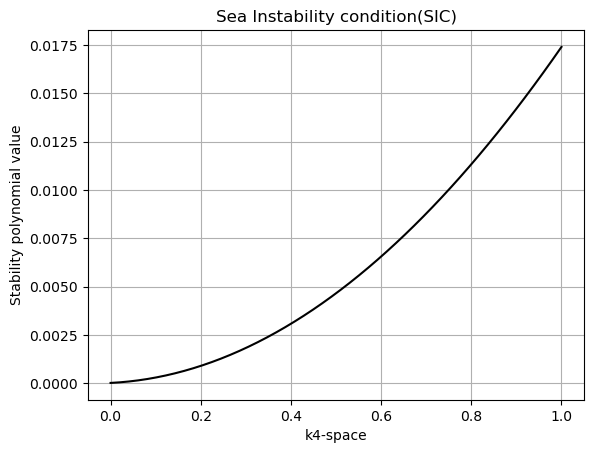

In [4]:
#Fixed point Analysis: Complete Model without Time delay (M1)
def jacob_entries(params, eqmb_vals):
    """
    Calculate specific Jacobian entries for M1 model

    args:
    params: tuple
        model parameter values
    eqmb_vals:
        equilibrium values for M1 dependent variables

    returns: list
        Jacobian entries for M1 model

    """
    k1, k2, k3 = params
    x1_e, ya_e = eqmb_vals
    alpha = k1*ya_e - k1*x1_e - k2
    beta = -k1*x1_e
    gamma = k2
    delta = -k3
    return [alpha, beta, gamma, delta]

#Parameters (Extracted from [1])
k1_M1 = 4.3e-5 
k2_M1 = 2e-2
k3_M1 = 1.6e-2

#Equilibrium values (Extracted from [1])
x1_e_M1 = 400
ya_e_M1 = 460

#Jacobain entries (Numerical values Extracted from [1])
alpha_paper = -1.7e-2
beta_paper = -1.7e-2
gamma_paper = 2e-2
delta_paper = -1.6e-2

#Calculate Jacobian entries and validate 
alpha_M1, beta_M1, gamma_M1, delta_M1 = jacob_entries((k1_M1,k2_M1,k3_M1),(x1_e_M1,ya_e_M1))
numpy.testing.assert_allclose((alpha_M1, beta_M1, gamma_M1), (alpha_paper, beta_paper, gamma_paper), rtol=1.e-3, atol=1.e-3)
print('P1-A: Jacobain Entries validated! Success!')
print('\n')
print('P1-B: The stability polynomial is positive for any positive value of k4. This stated in [1] as a necessary condition for stability.')
print('The proposition that the sea cannot cause instability in the grand system, is thus validated.')

#Validate stability of M1:
# M1_stability_cond_k4: Hurwitz stability criterion polynomial extracted from [1]
k4_M1_space = numpy.linspace(1e-6,1)
M1_stability_cond_k4 = [(k4_M1-alpha_M1-delta_M1)*(alpha_M1*delta_M1-beta_M1*gamma_M1+k4_M1*(beta_M1-alpha_M1-delta_M1)-k4_M1*delta_M1*(alpha_M1-beta_M1)) for k4_M1 in k4_M1_space]
figure1_M1 = plt.figure()
plt.plot(k4_M1_space, M1_stability_cond_k4, 'k')
plt.grid()
plt.xlabel('k4-space')
plt.ylabel('Stability polynomial value')
plt.title('Sea Instability condition(SIC)')
plt.show()

### P2: M2_sub Oscillation threshold (M2_sub OT) ###

P2-A: The stability polynomial is positive for all time-delays less than 119 years. This stated in [1] as a necessary condition for stability.
The absolute stability of model M2 is thus disturbed for the threshold time-lag = 119 years and onwards. [1] states that this critical (threshold) value is around 100 years.


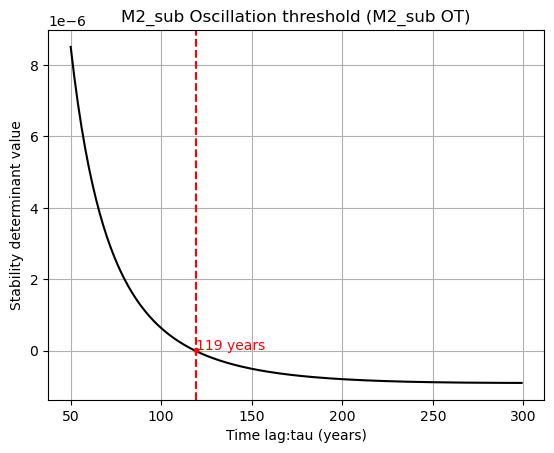

In [5]:
#Stability Analysis: Complete Model with Time delay (M2)
#M1_stability_cond_lag is the Hurwitz stability criterion determinant extracted from [1]
tau_M1_list = []
M1_stability_cond_lag_list = []
for tau_M1 in range(50, 300):
    M1_stability_cond_lag = numpy.linalg.det(numpy.array([[((1/tau_M1)-alpha_M1-gamma_M1-delta_M1), ((1/tau_M1)*((alpha_M1*delta_M1)-(beta_M1*gamma_M1)))],
                                                          [(1), ((-1/tau_M1)*(alpha_M1+delta_M1)+(alpha_M1+gamma_M1)*delta_M1)]]))
    tau_M1_list.append(tau_M1)  
    M1_stability_cond_lag_list.append(M1_stability_cond_lag)  

#Value of stability polynomial as a function of time-lag or time-delay
zero_crossing = numpy.where(numpy.array(M1_stability_cond_lag_list)<0)[0][0]
print('P2-A: The stability polynomial is positive for all time-delays less than %s years. This stated in [1] as a necessary condition for stability.'%(tau_M1_list[zero_crossing]))
print('The absolute stability of model M2 is thus disturbed for the threshold time-lag = %s years and onwards. [1] states that this critical (threshold) value is around 100 years.'%(tau_M1_list[zero_crossing]))
figure2_M1 = plt.figure()
plt.plot(tau_M1_list, M1_stability_cond_lag_list, 'k')
plt.axvline(x=tau_M1_list[zero_crossing], color='r', linestyle='--')
plt.plot(tau_M1_list[zero_crossing], M1_stability_cond_lag_list[zero_crossing-1], 'r.')
plt.text(x=tau_M1_list[zero_crossing], y=M1_stability_cond_lag_list[zero_crossing-1], s='119 years', c='r')
plt.grid()
plt.xlabel('Time lag:tau (years)')
plt.ylabel('Stability determinant value')
plt.title('M2_sub Oscillation threshold (M2_sub OT)')
plt.show()

### P3: Partial Model with Time delay (M2_sub) model ###

In [6]:
def carbon_cycle_M2_sub(t, variables):
    """
    Build the M2_sub model

    args:
    t: ndarray
        time-samples array
    variables: tuple
        dependent variables of the dynamical system
    parameters: tuple
        parameters and/or constants within the dynamical system
    
    returns:
    M2_sub: list
        The time derivates of dependent variables
    """
    x1, xd, x1_star = variables

    dx1_dt = k1_M2_sub * x1 * (a_M2_sub - x1 - xd) - (k2_M2_sub * x1_star)
    dxd_dt = (k2_M2_sub * x1_star) - (k3_M2_sub * xd)
    dx1_star_dt = (1/tau_M2_sub)*(x1-x1_star)
    M2_sub = [dx1_dt, dxd_dt, dx1_star_dt]

    return M2_sub

def jacobian(state,params):
    """ 
    Calculate the Jacobian Matrix for M2_sub model

    args:
    state: tuple 
        dependent variables of M2_sub
    params: tuple
        M2_sub parameters

    returns: numpy array
        Jacobian of M2_sub
    """
    x1, xd, x1_star = state
    k1_M2_sub, k2_M2_sub, k3_M2_sub, tau_M2_sub, a_M2_sub = params

    return numpy.array([[-k1_M2_sub * x1 + k1_M2_sub * (a_M2_sub - x1 - xd), -k1_M2_sub * x1, -k2_M2_sub],
                        [0, -k3_M2_sub, k2_M2_sub],
                        [(1/tau_M2_sub), 0, (-1/tau_M2_sub)]])

def equations(vars_inp):
    """
    Formulate fixed-point equations for M2_sub

    args: 
    vars_inp: tuple
        variables for fixed-point equations

    returns: list
        fixed-point equations for M2_sub
    """
    x1, xd, x1_star = vars_inp

    eq1 = k1_M2_sub * x1 * (a_M2_sub - x1 - xd) - (k2_M2_sub * x1_star)
    eq2 = (k2_M2_sub * x1_star) - (k3_M2_sub * xd)
    eq3 = (1/tau_M2_sub)*(x1-x1_star)

    return [eq1, eq2, eq3]

#Parameters extracted from [1]
k1_M2_sub = 4.3e-5
k2_M2_sub = 2e-2
k3_M2_sub = 1.6e-2
k4_M2_sub = 0
k5_M2_sub = 1.8e-2
tau_M2_sub = 65

#Initial Conditions extracted from [1]
gap = 0 
x10_M2_sub = 360
xd0_M2_sub = 500
x1_star0_M2_sub = 360
initial_conditions = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub]
y_a0_M2_sub = 500 
a_M2_sub = numpy.sum(initial_conditions[:-1]) + y_a0_M2_sub + gap

P3-A: Transient Analysis
The results for the M2_sub model, Fig 13 in [1], are validated (atleast from visual inspection) from the 2D plots given below. The initial state is (x1=360, xd=500, x1_star=500, ya=500) as given in [1].
From these plots, it seems like the system moves towards a state of equilibrium.


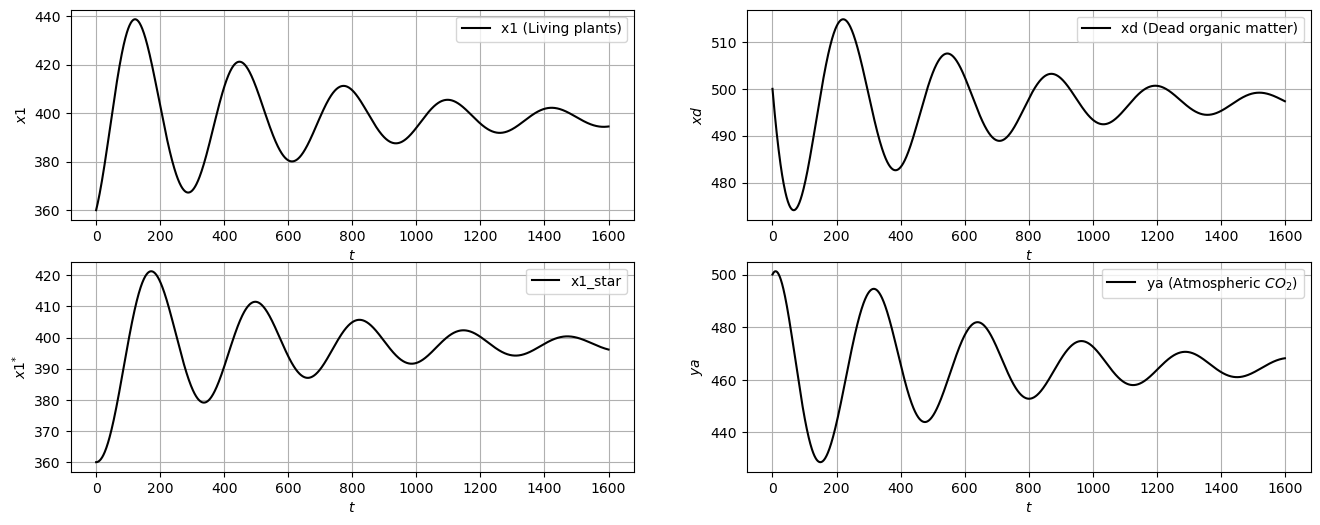

The 3D plot given below depicts the time evolution of the system (x1,xd,ya) for the initial state (x1=360, xd=500, x1_star=500, ya=500). It seems that the system moves to an equilibrium point somehwere in the interior of the spiral.


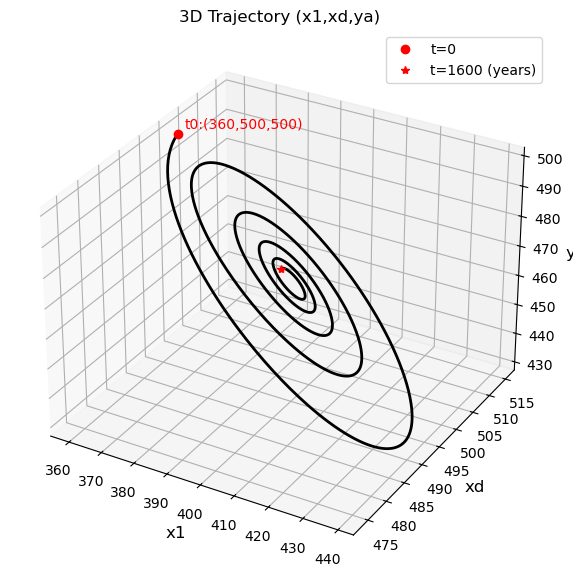

In [7]:
# Time span for the simulation
t_end = 1600
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)

#solve the IVP
solution_M2_sub = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

#Plot 2D,3D time-evolution trajectories
print('P3-A: Transient Analysis')
print('The results for the M2_sub model, Fig 13 in [1], are validated (atleast from visual inspection) from the 2D plots given below. The initial state is (x1=360, xd=500, x1_star=500, ya=500) as given in [1].')
print('From these plots, it seems like the system moves towards a state of equilibrium.')
figure1_M2sub = plt.figure(figsize=(16,6))
axes = figure1_M2sub.add_subplot(2,2,1)
axes.plot(solution_M2_sub.t, solution_M2_sub.y[0], 'k', label='x1 (Living plants)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.legend()

axes = figure1_M2sub.add_subplot(2,2,2)
axes.plot(solution_M2_sub.t, solution_M2_sub.y[1], 'k', label='xd (Dead organic matter)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.legend()

axes = figure1_M2sub.add_subplot(2,2,3)
axes.plot(solution_M2_sub.t, solution_M2_sub.y[2], 'k', label='x1_star')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.legend()

axes = figure1_M2sub.add_subplot(2,2,4)
axes.plot(solution_M2_sub.t, a_M2_sub-solution_M2_sub.y[0]-solution_M2_sub.y[1], 'k', label='ya (Atmospheric $CO_{2}$)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ya$')
axes.legend()
plt.show()

print('The 3D plot given below depicts the time evolution of the system (x1,xd,ya) for the initial state (x1=360, xd=500, x1_star=500, ya=500). It seems that the system moves to an equilibrium point somehwere in the interior of the spiral.')
figure2_M2sub  = plt.figure(figsize=(12,7))
ax = figure2_M2sub.add_subplot(111, projection='3d')
ax.plot(solution_M2_sub.y[0], solution_M2_sub.y[1], a_M2_sub-solution_M2_sub.y[0]-solution_M2_sub.y[1], 'k', lw=2)
ax.plot(solution_M2_sub.y[0][0], solution_M2_sub.y[1][0], list(a_M2_sub-solution_M2_sub.y[0]-solution_M2_sub.y[1])[0], 'ro',label='t=0')
ax.text(solution_M2_sub.y[0][0]+1, solution_M2_sub.y[1][0]+1, list(a_M2_sub-solution_M2_sub.y[0]-solution_M2_sub.y[1])[0]+1, "t0:(360,500,500)", color='red')
ax.plot(solution_M2_sub.y[0][-1], solution_M2_sub.y[1][-1], list(a_M2_sub-solution_M2_sub.y[0]-solution_M2_sub.y[1])[-1], 'r*', label='t=1600 (years)')
ax.set_title("3D Trajectory (x1,xd,ya)")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('xd', fontsize=12)
ax.set_zlabel('ya', fontsize=12)
ax.legend()
plt.show()

##### B: Investigating solve_ivp methods,tolerances for M2_sub model: #####

P3-Bi: The M2_sub model IVP is solved using different solve_ivp methods namely :RK45, RK23, DOP853 and Radau.
It is evident from the below plots that the solutions corresponding to each method are highly consistent and that the M2_sub model is not sensitive to the solver method. Since all the models considered throughout this exercise are very similar, it is postulated that this phenomenon would be observed across all models.
Thus for all further analyses throughout this exercise the general method = RK45 is fixed.


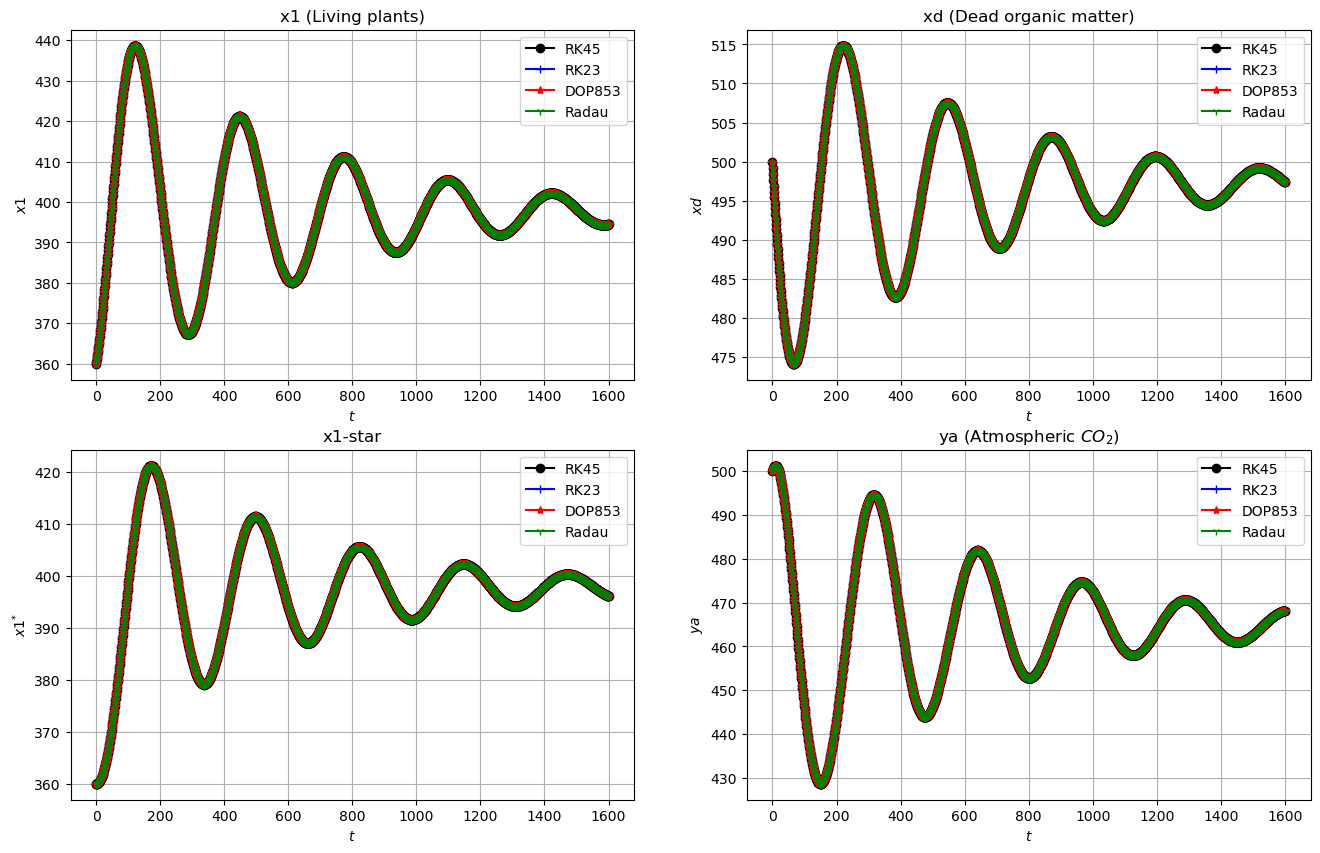



P3-Bii: The M2_sub model IVP is solved for various rtol,atol within the solve_ivp.
It is evident from the below plots that the considered range of tolerances is acceptable and leads to fairly consistent results, higher the tolerances better the solution.
For all further analyses throughout this exercise (rtol=1e-8 and atol=1e-15) is fixed.
Note: The ordered pair in the legends for each of the plot below is (rtol,atol).


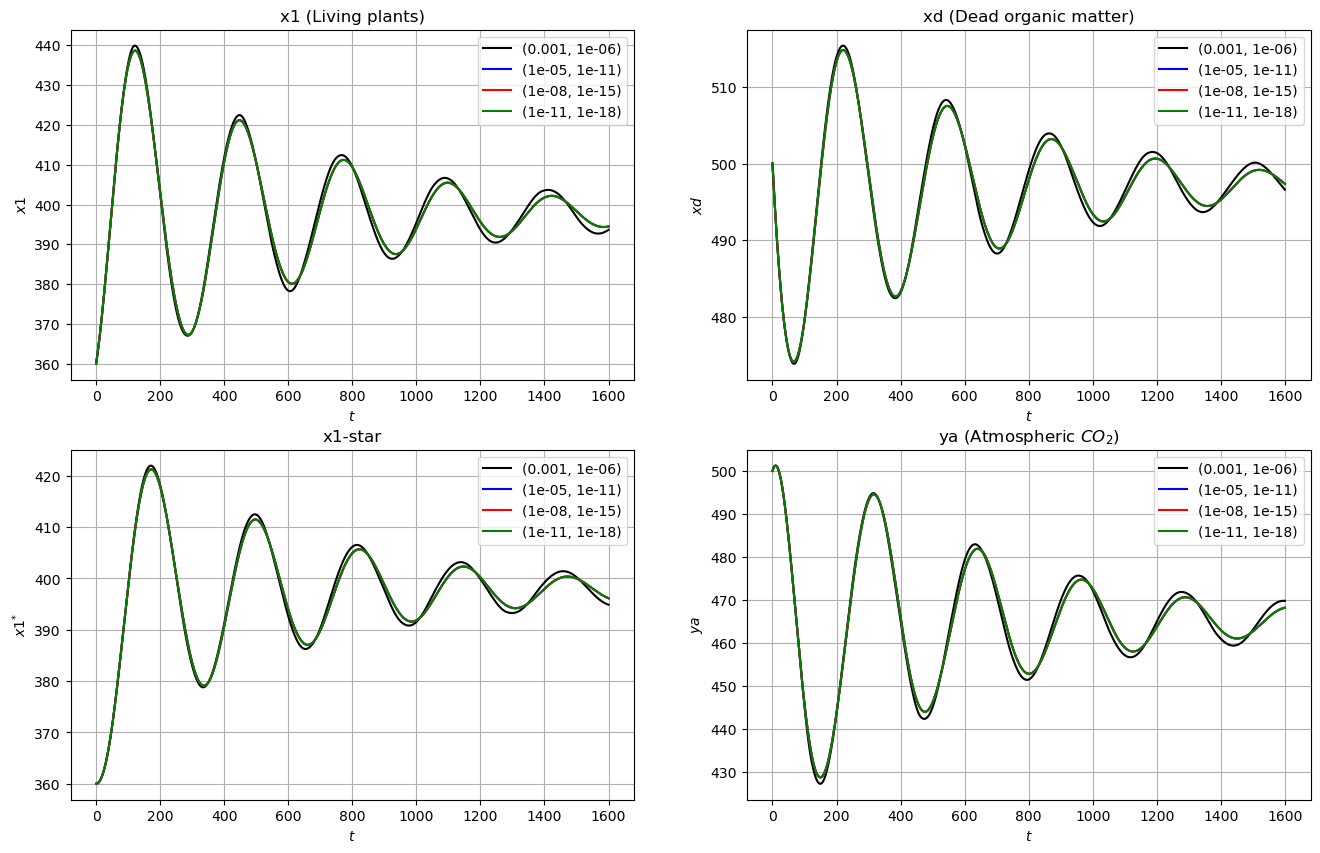

In [8]:
#Test solve_ivp methods and tolerances
print('P3-Bi: The M2_sub model IVP is solved using different solve_ivp methods namely :RK45, RK23, DOP853 and Radau.')
print('It is evident from the below plots that the solutions corresponding to each method are highly consistent and that the M2_sub model is not sensitive to the solver method. Since all the models considered throughout this exercise are very similar, it is postulated that this phenomenon would be observed across all models.')
print('Thus for all further analyses throughout this exercise the general method = RK45 is fixed.')
solve_ivp_methods = ['RK45', 'RK23', 'DOP853', 'Radau']
methods_colors = ['k', 'b', 'r', 'g']
methods_markers = ['o', '+', '*', '1']
methods_solutions = []
for method_item in solve_ivp_methods:
    methods_solutions.append(solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions, method= method_item, t_eval=t_eval ,rtol=1e-8, atol=1e-15))

figure2_M2sub = plt.figure(figsize=(16,10))
axes = figure2_M2sub.add_subplot(2,2,1)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, method_sol.y[0], color=methods_colors[idx], marker=methods_markers[idx], label=solve_ivp_methods[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.set_title('x1 (Living plants)')
axes.legend()

axes = figure2_M2sub.add_subplot(2,2,2)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, method_sol.y[1], color=methods_colors[idx],marker=methods_markers[idx] , label=solve_ivp_methods[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.set_title('xd (Dead organic matter)')
axes.legend()

axes = figure2_M2sub.add_subplot(2,2,3)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, method_sol.y[2], color=methods_colors[idx] ,marker=methods_markers[idx] ,  label=solve_ivp_methods[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.set_title('x1-star')
axes.legend()

axes = figure2_M2sub.add_subplot(2,2,4)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, a_M2_sub-method_sol.y[0]-method_sol.y[1], color=methods_colors[idx] ,marker=methods_markers[idx] ,  label=solve_ivp_methods[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ya$')
axes.set_title('ya (Atmospheric $CO_{2}$)')
axes.legend()
plt.show()

print('\n')
print('P3-Bii: The M2_sub model IVP is solved for various rtol,atol within the solve_ivp.')
print('It is evident from the below plots that the considered range of tolerances is acceptable and leads to fairly consistent results, higher the tolerances better the solution.')
print('For all further analyses throughout this exercise (rtol=1e-8 and atol=1e-15) is fixed.')
print('Note: The ordered pair in the legends for each of the plot below is (rtol,atol).')
rtols = [1e-3, 1e-5, 1e-8, 1e-11]
atols = [1e-6, 1e-11, 1e-15, 1e-18]
methods_colors = ['k', 'b', 'r', 'g']
methods_markers = ['', '', '', '']
methods_solutions = []
for tol_item in list(zip(rtols, atols)):
    methods_solutions.append(solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions, t_eval=t_eval ,rtol=tol_item[0], atol=tol_item[1]))

figure3_M2sub = plt.figure(figsize=(16,10))
axes = figure3_M2sub.add_subplot(2,2,1)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, method_sol.y[0], color=methods_colors[idx], marker=methods_markers[idx], label=list(zip(rtols, atols))[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.set_title('x1 (Living plants)')
axes.legend()

axes = figure3_M2sub.add_subplot(2,2,2)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, method_sol.y[1], color=methods_colors[idx],marker=methods_markers[idx] , label=list(zip(rtols, atols))[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.set_title('xd (Dead organic matter)')
axes.legend()

axes = figure3_M2sub.add_subplot(2,2,3)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, method_sol.y[2], color=methods_colors[idx] ,marker=methods_markers[idx] ,  label=list(zip(rtols, atols))[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.set_title('x1-star')
axes.legend()

axes = figure3_M2sub.add_subplot(2,2,4)
for idx, method_sol in enumerate(methods_solutions):
    axes.plot(method_sol.t, a_M2_sub-method_sol.y[0]-method_sol.y[1], color=methods_colors[idx] ,marker=methods_markers[idx] ,  label=list(zip(rtols, atols))[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ya$')
axes.set_title('ya (Atmospheric $CO_{2}$)')
axes.legend()
plt.show()

##### C: Fixed Point Stability Analysis #####

P3-Ci: Fixed Point Estimation
Non-trivial Fixed Point by Analytical calculation: x1 = 397.7260981912145, xd = 497.1576227390181 and x1_star = 397.7260981912145 
Fixed Point by scipy.optimize.fsolve (Initial guess = [300, 300, 300]): x1 = 397.7260981912363, xd = 497.15762273904534 and x1_star = 397.7260981912363 
Fixed Point values validated! Success!
Trivial Fixed Point by Analytical calculation: x1 = 0, xd = 0 and x1_star = 0 
Trivial Fixed Point by scipy.optimize.fsolve (Initial guess = [200, 300, 300]): x1 = -2.4e-322, xd = -6e-322 and x1_star = -3e-322 


P3-Cii: Stability analysis of Fixed Points
Eigenvalues of the Jacobian for the non-trivial Fixed Point are: (-0.0017005001892466537+0.019356959214157324j), (-0.0017005001892466537-0.019356959214157324j), (-0.025085837228347355+0j)
Eigenvalues of the Jacobian for the trivial Fixed Point are: -0.016, 0.05404850835570843, -0.010953123740323815
Since the real-part of all the eigenvalues corresponding to the non-trivial fixed point are

/tmp/ipykernel_458120/782723343.py:17: RuntimeWarning: xtol=0.000100 is too small, no further improvement in the approximate
  solution is possible.
  solution_eqmb_trivial = fsolve(equations, initial_guess_trivial,xtol=1e-4)




The following 3D plots show the time evolution of system (x1,xd,ya) for various initial conditions namely:
I1 = (x1 = 360,xd = 500,ya = 500)
I2 = (x1 = 350,xd = 490,ya = 520)
I3 = (x1 = 260,xd = 500,ya = 600)
I4 = (x1 = 417.7260981912363,xd = 517.1576227390453,ya = 425.1162790697183)
I5 = (x1 = 402.7260981912363,xd = 502.15762273904534,ya = 455.1162790697183)
I1, I2 and I3 start farther from the equilibrium than I4 and I5. However it is visually evident that all trajectories eventually spiral into the equilibrium point


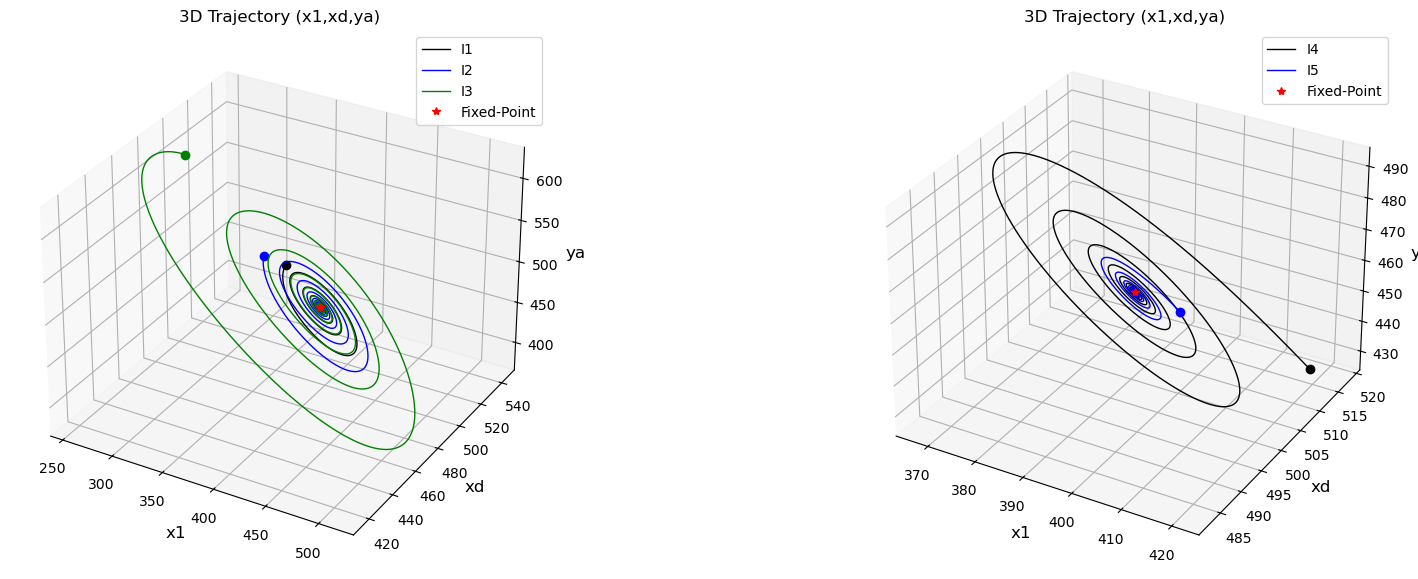



The following 2D plots show the asymptotic time evolution of system (x1,xd,ya) for the inital condition (x1 = 360,xd = 500,ya = 500)
It is visually evident that the system moves towards the equilibrium point.


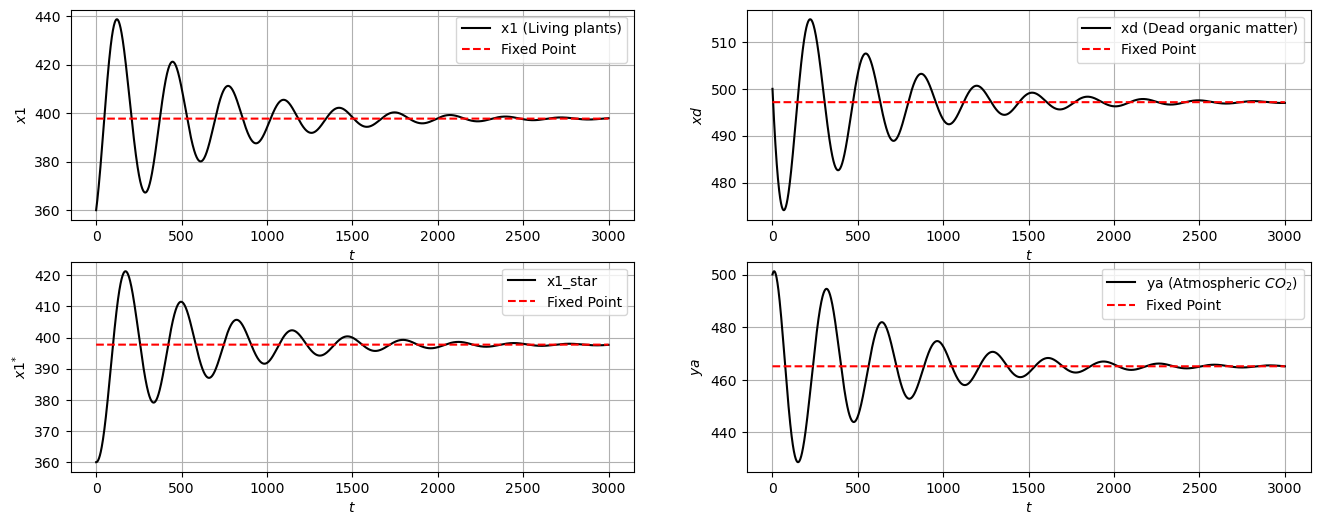

The following plots show the error of system (x1,xd,ya) for the inital condition (x1 = 360,xd = 500,ya = 500) with respect to the equilibrium/fixed point.
Due to the damped oscillation near the beginning the error oscillates but eventually decays to 0 as the system settles at the equilibrium/fixed point.
The damped time-evolution of the M2_sub model is thus validated.


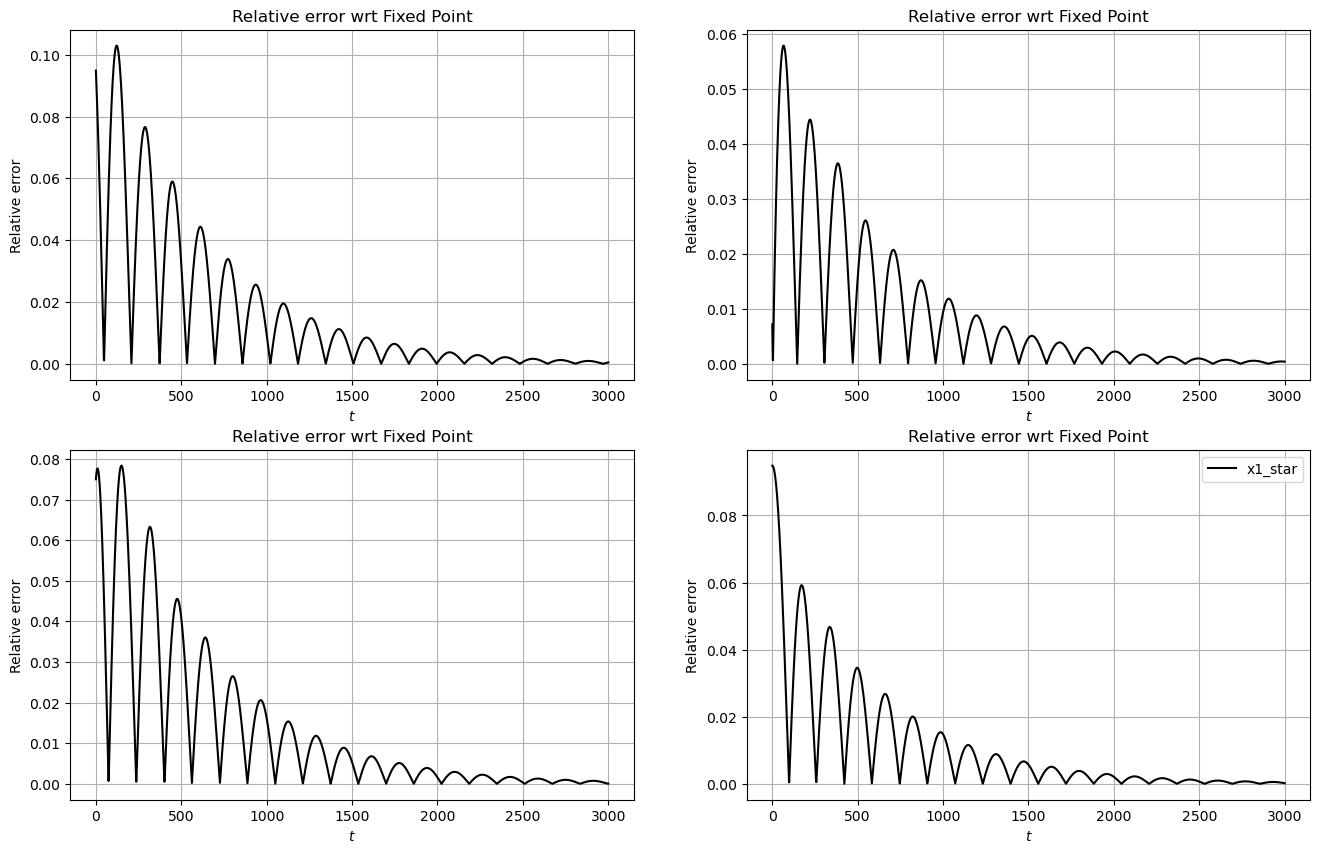

In [9]:
#Fixed Point calculation
print('P3-Ci: Fixed Point Estimation')
#Fixed Points using scipy-optimize-fsolve
initial_guess = [300, 300, 300]
solution_eqmb = fsolve(equations, initial_guess)

#Analytical calculation
x1_e = (a_M2_sub-(k2_M2_sub/k1_M2_sub))/(1+(k2_M2_sub/k3_M2_sub))
xd_e = (k2_M2_sub/k3_M2_sub)*x1_e
x1_star_e = x1_e

print('Non-trivial Fixed Point by Analytical calculation: x1 = %s, xd = %s and x1_star = %s '%(x1_e,xd_e,x1_star_e))
print('Fixed Point by scipy.optimize.fsolve (Initial guess = [300, 300, 300]): x1 = %s, xd = %s and x1_star = %s '%(solution_eqmb[0],solution_eqmb[1],solution_eqmb[2]))
numpy.testing.assert_allclose((x1_e, xd_e, x1_star_e), (solution_eqmb[0], solution_eqmb[1], solution_eqmb[2]), rtol=1.e-3, atol=1.e-3)
print('Fixed Point values validated! Success!')
initial_guess_trivial = [100, 300, 300]
solution_eqmb_trivial = fsolve(equations, initial_guess_trivial,xtol=1e-4)
print('Trivial Fixed Point by Analytical calculation: x1 = %s, xd = %s and x1_star = %s '%(0,0,0))
print('Trivial Fixed Point by scipy.optimize.fsolve (Initial guess = [200, 300, 300]): x1 = %s, xd = %s and x1_star = %s '%(solution_eqmb_trivial[0],solution_eqmb_trivial[1],solution_eqmb_trivial[2]))
print('\n')

#Linearization and Stability analysis of Fixed Points
print('P3-Cii: Stability analysis of Fixed Points')
J = jacobian((solution_eqmb[0],solution_eqmb[1],solution_eqmb[2]),(k1_M2_sub, k2_M2_sub, k3_M2_sub, tau_M2_sub, a_M2_sub))
J_t = jacobian((solution_eqmb_trivial[0],solution_eqmb_trivial[1],solution_eqmb_trivial[2]),(k1_M2_sub, k2_M2_sub, k3_M2_sub, tau_M2_sub, a_M2_sub))
print('Eigenvalues of the Jacobian for the non-trivial Fixed Point are: %s, %s, %s'%(numpy.linalg.eigvals(J)[0],numpy.linalg.eigvals(J)[1],numpy.linalg.eigvals(J)[2]))
print('Eigenvalues of the Jacobian for the trivial Fixed Point are: %s, %s, %s'%(numpy.linalg.eigvals(J_t)[0],numpy.linalg.eigvals(J_t)[1],numpy.linalg.eigvals(J_t)[2]))
print('Since the real-part of all the eigenvalues corresponding to the non-trivial fixed point are negative, it should be a stable equilibrium/fixed point. On the other hand, the trivial fixed point is unstable owing to its positive real part.')

#Asymptotic analysis: 3D and 2D
#3D Trajectories for various initial conditions
t_end = 4000
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)
gap = 0
x10_M2_sub = 360
xd0_M2_sub = 500
x1_star0_M2_sub = 360
initial_conditions1 = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub] 
solution_M2_sub1 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions1, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

gap = 0
deflect = 10
x10_M2_sub = 360 - deflect
xd0_M2_sub = 500 - deflect
x1_star0_M2_sub = 360 - deflect
initial_conditions2 = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub] 
solution_M2_sub2 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions2, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

gap = 0
deflect = 100
x10_M2_sub = 360 - deflect
xd0_M2_sub = 500 
x1_star0_M2_sub = 360 
initial_conditions3 = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub]
solution_M2_sub3 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions3, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

gap = 0
deflect = 20
x10_M2_sub = solution_eqmb[0] + deflect 
xd0_M2_sub = solution_eqmb[1] + deflect
x1_star0_M2_sub = solution_eqmb[2] + deflect
initial_conditions4 = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub]
solution_M2_sub4 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions4, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

gap = 0
deflect = 5
x10_M2_sub = solution_eqmb[0] + deflect 
xd0_M2_sub = solution_eqmb[1] + deflect
x1_star0_M2_sub = solution_eqmb[2] + deflect
initial_conditions5 = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub]
solution_M2_sub5 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions5, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

print('\n')
print('The following 3D plots show the time evolution of system (x1,xd,ya) for various initial conditions namely:')
print('I1 = (x1 = 360,xd = 500,ya = 500)')
print('I2 = (x1 = 350,xd = 490,ya = 520)')
print('I3 = (x1 = 260,xd = 500,ya = 600)')
print('I4 = (x1 = %s,xd = %s,ya = %s)'%(solution_eqmb[0]+20,solution_eqmb[1]+20,a_M2_sub - solution_eqmb[0] - solution_eqmb[1] - 40))
print('I5 = (x1 = %s,xd = %s,ya = %s)'%(solution_eqmb[0]+5,solution_eqmb[1]+5,a_M2_sub - solution_eqmb[0] - solution_eqmb[1] - 10))
print('I1, I2 and I3 start farther from the equilibrium than I4 and I5. However it is visually evident that all trajectories eventually spiral into the equilibrium point')
#3D Plots
figure4_M2sub  = plt.figure(figsize=(20,7))
ax = figure4_M2sub.add_subplot(121, projection='3d')
ax.plot(solution_M2_sub1.y[0], solution_M2_sub1.y[1], a_M2_sub-solution_M2_sub1.y[0]-solution_M2_sub1.y[1], 'k', label='I1', lw=1)
ax.plot(solution_M2_sub1.y[0][0], solution_M2_sub1.y[1][0], list(a_M2_sub-solution_M2_sub1.y[0]-solution_M2_sub1.y[1])[0], 'ko')
ax.plot(solution_M2_sub2.y[0], solution_M2_sub2.y[1], a_M2_sub-solution_M2_sub2.y[0]-solution_M2_sub2.y[1], 'b', label='I2', lw=1)
ax.plot(solution_M2_sub2.y[0][0], solution_M2_sub2.y[1][0], list(a_M2_sub-solution_M2_sub2.y[0]-solution_M2_sub2.y[1])[0], 'bo')
ax.plot(solution_M2_sub3.y[0], solution_M2_sub3.y[1], a_M2_sub-solution_M2_sub3.y[0]-solution_M2_sub3.y[1], 'g', label='I3', lw=1)
ax.plot(solution_M2_sub3.y[0][0], solution_M2_sub3.y[1][0], list(a_M2_sub-solution_M2_sub3.y[0]-solution_M2_sub3.y[1])[0], 'go')
ax.plot(solution_eqmb[0], solution_eqmb[1], a_M2_sub-solution_eqmb[0]-solution_eqmb[1], 'r*',label='Fixed-Point')
ax.set_title("3D Trajectory (x1,xd,ya)")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('xd', fontsize=12)
ax.set_zlabel('ya', fontsize=12)
ax.legend(loc='best')

ax = figure4_M2sub.add_subplot(122, projection='3d')
ax.plot(solution_M2_sub4.y[0], solution_M2_sub4.y[1], a_M2_sub-solution_M2_sub4.y[0]-solution_M2_sub4.y[1], 'k', label='I4', lw=1)
ax.plot(solution_M2_sub4.y[0][0], solution_M2_sub4.y[1][0], list(a_M2_sub-solution_M2_sub4.y[0]-solution_M2_sub4.y[1])[0], 'ko')
ax.plot(solution_M2_sub5.y[0], solution_M2_sub5.y[1], a_M2_sub-solution_M2_sub5.y[0]-solution_M2_sub5.y[1], 'b', label='I5', lw=1)
ax.plot(solution_M2_sub5.y[0][0], solution_M2_sub5.y[1][0], list(a_M2_sub-solution_M2_sub5.y[0]-solution_M2_sub5.y[1])[0], 'bo')
ax.plot(solution_eqmb[0], solution_eqmb[1], a_M2_sub-solution_eqmb[0]-solution_eqmb[1], 'r*',label='Fixed-Point')
ax.set_title("3D Trajectory (x1,xd,ya)")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('xd', fontsize=12)
ax.set_zlabel('ya', fontsize=12)
ax.legend(loc='upper right')
plt.show()


#2D Analysis
t_end = 3000
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)

solution_M2_sub4 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

#2D Plots
print('\n')
print('The following 2D plots show the asymptotic time evolution of system (x1,xd,ya) for the inital condition (x1 = 360,xd = 500,ya = 500)')
print('It is visually evident that the system moves towards the equilibrium point.')
figure5_M2sub = plt.figure(figsize=(16,6))
axes = figure5_M2sub.add_subplot(2,2,1)
axes.plot(solution_M2_sub4.t, solution_M2_sub4.y[0], 'k', label='x1 (Living plants)')
axes.plot(solution_M2_sub4.t, numpy.ones(len(list(solution_M2_sub4.t)))*(solution_eqmb[0]), '--r', label='Fixed Point')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.legend()

axes = figure5_M2sub.add_subplot(2,2,2)
axes.plot(solution_M2_sub4.t, solution_M2_sub4.y[1], 'k', label='xd (Dead organic matter)')
axes.plot(solution_M2_sub4.t, numpy.ones(len(list(solution_M2_sub4.t)))*(solution_eqmb[1]), '--r', label='Fixed Point')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.legend()

axes = figure5_M2sub.add_subplot(2,2,3)
axes.plot(solution_M2_sub4.t, solution_M2_sub4.y[2], 'k', label='x1_star')
axes.plot(solution_M2_sub4.t, numpy.ones(len(list(solution_M2_sub4.t)))*(solution_eqmb[2]), '--r', label='Fixed Point')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.legend()

axes = figure5_M2sub.add_subplot(2,2,4)
axes.plot(solution_M2_sub4.t, a_M2_sub-solution_M2_sub4.y[0]-solution_M2_sub4.y[1], 'k', label='ya (Atmospheric $CO_{2}$)')
axes.plot(solution_M2_sub4.t, numpy.ones(len(list(solution_M2_sub4.t)))*( a_M2_sub-solution_eqmb[0]-solution_eqmb[1]), '--r', label='Fixed Point')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ya$')
axes.legend()
plt.show()

#Error analysis
print('The following plots show the error of system (x1,xd,ya) for the inital condition (x1 = 360,xd = 500,ya = 500) with respect to the equilibrium/fixed point.')
print('Due to the damped oscillation near the beginning the error oscillates but eventually decays to 0 as the system settles at the equilibrium/fixed point.')
print('The damped time-evolution of the M2_sub model is thus validated.')
rel_err_x1 = numpy.abs(solution_M2_sub4.y[0]-solution_eqmb[0])/numpy.abs(solution_eqmb[0])
rel_err_xd = numpy.abs(solution_M2_sub4.y[1]-solution_eqmb[1])/numpy.abs(solution_eqmb[0])
rel_err_ya = numpy.abs((a_M2_sub-solution_M2_sub4.y[0]-solution_M2_sub4.y[1])-(a_M2_sub-solution_eqmb[0]-solution_eqmb[1]))/numpy.abs(a_M2_sub-solution_eqmb[0]-solution_eqmb[1])
rel_err_x1_star = numpy.abs(solution_M2_sub4.y[2]-solution_eqmb[2])/numpy.abs(solution_eqmb[2])

figure6_M2sub = plt.figure(figsize=(16,10))
axes = figure6_M2sub.add_subplot(2,2,1)
axes.plot(solution_M2_sub4.t, rel_err_x1, 'k', label='x1')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error wrt Fixed Point')

axes = figure6_M2sub.add_subplot(2,2,2)
axes.plot(solution_M2_sub4.t, rel_err_xd, 'k', label='xd')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error wrt Fixed Point')

axes = figure6_M2sub.add_subplot(2,2,3)
axes.plot(solution_M2_sub4.t, rel_err_ya, 'k', label='ya')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error wrt Fixed Point')

axes = figure6_M2sub.add_subplot(2,2,4)
axes.plot(solution_M2_sub4.t, rel_err_x1_star, 'k', label='x1_star')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error wrt Fixed Point')
axes.legend()
plt.show()

### P4: Partial Model with Time delay (M2_sub) with Oscillations ###

P4-A: Transient Analysis for tau = 110 years with inital conditions extracted from [1]
The results for the M2_sub model, Fig 14 in [1], are validated (atelast from visual inspection) from the plots given below
Sustained oscillations are observed in system for this value of tau = 110 years as postulated in [1]. It is fairly consistent with the result from P2 which estimates the threshold to be 119 years.
The Time Period period of oscillations of atmospheric carbon content (ya) is = 400.0 years


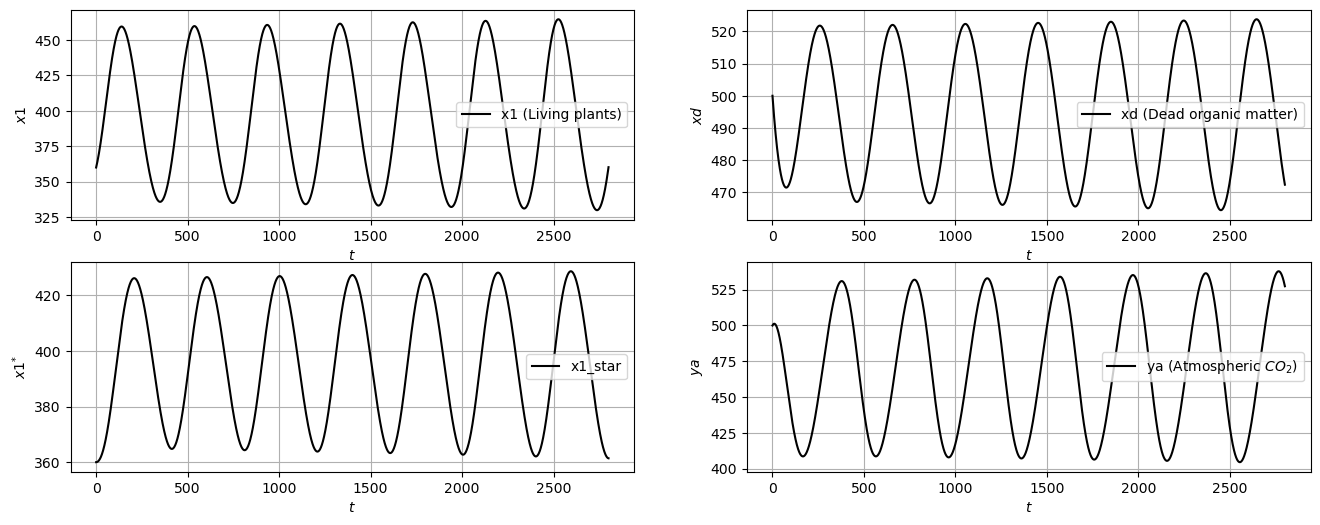



P4-B: Fixed Point Estimation
Non-trivial Fixed Point by Analytical calculation: x1 = 397.7260981912145, xd = 497.1576227390181 and x1_star = 397.7260981912145 
Non-trivial Fixed Point by scipy.optimize.fsolve (Initial guess = [300, 300, 300]): x1 = 397.7260981912145, xd = 497.1576227390181 and x1_star = 397.7260981912145 
Fixed Point values validated! Success!


P4-C: Stability Analysis of Fixed Points
Eigenvalues of the Jacobian for the non-trivial fixed point are: (-3.5283688634908754e-05+0.015906051434304094j), (-3.5283688634908754e-05-0.015906051434304094j), (-0.022122563935861494+0j)
A thing to note here is that the complex-conjugate eigenvalues for the non-trivial fixed point have real parts of the order of 3e-5 i.e. nearly zero..
It is known from empirical analysis [2] that a fixed point with purely imaginary eigenvalues acts like a center, around which the system revolves. This is a possible inference about the stability of the non-trivial fixed point.


The 3D plot given bel

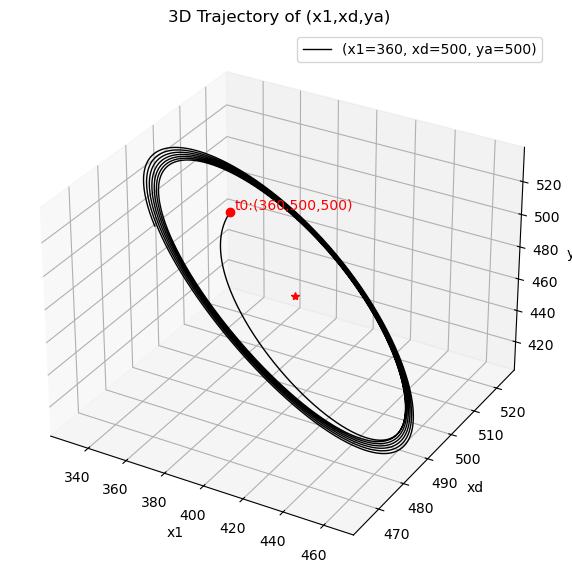

The 3D plot given below depicts the time evolution of the system (x1,xd,ya) for two different inital states I1 and I2.
A similar observation is noted that the system continues to move in cycles around the fixed point
Thus the time-evolution of the system concurs with the inference obtained in P4-C regarding stability of the non-trivial fixed point.


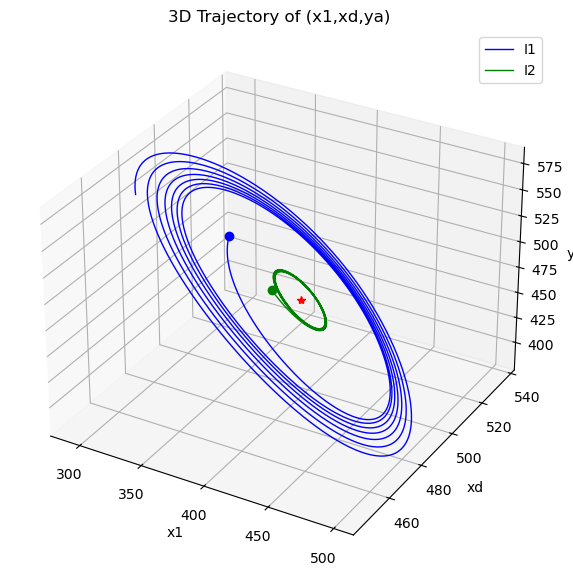

In [10]:
#M2_sub with tau = 110 years
def find_period(signal):
    """
    Estimates the period of a signal using periodogram
    
    args:
    signal: numpy array
        input periodic signal
    
    returns: 
    period: float
        Time period of the input signal
    """

    f, Pxx = periodogram(signal)
    peak_indices, _ = find_peaks(Pxx)
    peak_freq = f[peak_indices[numpy.argmax(Pxx[peak_indices])]]
    period = 1 / peak_freq

    return period

#Parameters extracted from [1]
k1_M2_sub = 4.3e-5
k2_M2_sub = 2e-2
k3_M2_sub = 1.6e-2
k4_M2_sub = 0
k5_M2_sub = 1.8e-2
tau_M2_sub = 110

#Initial Conditions extracted from [1]
gap = 0
x10_M2_sub = 360
xd0_M2_sub = 500
x1_star0_M2_sub = 360
initial_conditions = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub]
y_a0_M2_sub = 500 
a_M2_sub = numpy.sum(initial_conditions[:-1]) + y_a0_M2_sub + gap

t_end = 2800
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)
solution_M2_sub_oscill = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

#Different Conditions
gap = 0
deflect = 10
x10_M2_sub = 360 - deflect
xd0_M2_sub = 500 - deflect
x1_star0_M2_sub = 360 - deflect
initial_conditions2 = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub]
solution_M2_sub_oscill2 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions2, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

print('P4-A: Transient Analysis for tau = 110 years with inital conditions extracted from [1]')
print('The results for the M2_sub model, Fig 14 in [1], are validated (atelast from visual inspection) from the plots given below')
print('Sustained oscillations are observed in system for this value of tau = 110 years as postulated in [1]. It is fairly consistent with the result from P2 which estimates the threshold to be 119 years.')
period = find_period(a_M2_sub - solution_M2_sub_oscill.y[0] - solution_M2_sub_oscill.y[1])
print("The Time Period period of oscillations of atmospheric carbon content (ya) is = %s years"%(period))

figure6_M2sub = plt.figure(figsize=(16,6))
axes = figure6_M2sub.add_subplot(2,2,1)
axes.plot(solution_M2_sub_oscill.t, solution_M2_sub_oscill.y[0], 'k', label='x1 (Living plants)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.legend()

axes = figure6_M2sub.add_subplot(2,2,2)
axes.plot(solution_M2_sub_oscill.t, solution_M2_sub_oscill.y[1], 'k', label='xd (Dead organic matter)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.legend()

axes = figure6_M2sub.add_subplot(2,2,3)
axes.plot(solution_M2_sub_oscill.t, solution_M2_sub_oscill.y[2], 'k', label='x1_star')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.legend()

axes = figure6_M2sub.add_subplot(2,2,4)
axes.plot(solution_M2_sub_oscill.t, a_M2_sub-solution_M2_sub_oscill.y[0]-solution_M2_sub_oscill.y[1], 'k', label='ya (Atmospheric $CO_{2}$)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ya$')
axes.legend()
plt.show()

print('\n')
print('P4-B: Fixed Point Estimation')
#Fixed Points using scipy-optimize-fsolve
initial_guess = [300, 300, 300]
solution_eqmb2 = fsolve(equations, initial_guess)

#Analytical calculation
x1_e = (a_M2_sub-(k2_M2_sub/k1_M2_sub))/(1+(k2_M2_sub/k3_M2_sub))
xd_e = (k2_M2_sub/k3_M2_sub)*x1_e
x1_star_e = x1_e
print('Non-trivial Fixed Point by Analytical calculation: x1 = %s, xd = %s and x1_star = %s '%(x1_e,xd_e,x1_star_e))
print('Non-trivial Fixed Point by scipy.optimize.fsolve (Initial guess = [300, 300, 300]): x1 = %s, xd = %s and x1_star = %s '%(solution_eqmb2[0],solution_eqmb2[1],solution_eqmb2[2]))
numpy.testing.assert_allclose((x1_e, xd_e, x1_star_e), (solution_eqmb2[0], solution_eqmb2[1], solution_eqmb2[2]), rtol=1.e-3, atol=1.e-3)
print('Fixed Point values validated! Success!')

gap = 0
deflect = 10
x10_M2_sub = solution_eqmb2[0] - deflect
xd0_M2_sub = solution_eqmb2[1] - deflect
x1_star0_M2_sub = solution_eqmb2[2] - deflect
initial_conditions3 = [x10_M2_sub, xd0_M2_sub, x1_star0_M2_sub]
y_a0_M2_sub = a_M2_sub - solution_eqmb2[0] - solution_eqmb2[1]
solution_M2_sub_oscill3 = solve_ivp(carbon_cycle_M2_sub, t_span, initial_conditions3, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

#Linearization and Stability analysis of Fixed Points
print('\n')
print('P4-C: Stability Analysis of Fixed Points')
J = jacobian((solution_eqmb2[0],solution_eqmb2[1],solution_eqmb2[2]),(k1_M2_sub, k2_M2_sub, k3_M2_sub, tau_M2_sub, a_M2_sub))
print('Eigenvalues of the Jacobian for the non-trivial fixed point are: %s, %s, %s'%(numpy.linalg.eigvals(J)[0],numpy.linalg.eigvals(J)[1],numpy.linalg.eigvals(J)[2]))
print('A thing to note here is that the complex-conjugate eigenvalues for the non-trivial fixed point have real parts of the order of 3e-5 i.e. nearly zero..')
print('It is known from empirical analysis [2] that a fixed point with purely imaginary eigenvalues acts like a center, around which the system revolves. This is a possible inference about the stability of the non-trivial fixed point.')

print('\n')
print('The 3D plot given below depicts the time evolution of the system (x1,xd,ya) for the initial state (x1=360, xd=500, ya=500). It seems that the system continues to move in cycles around the fixed point.')
figure7_M2sub  = plt.figure(figsize=(10,7))
ax = figure7_M2sub.add_subplot(111, projection='3d')
ax.plot(solution_M2_sub_oscill.y[0], solution_M2_sub_oscill.y[1], a_M2_sub-solution_M2_sub_oscill.y[0]-solution_M2_sub_oscill.y[1], 'k', label='(x1=360, xd=500, ya=500)', lw=1)
ax.plot(solution_M2_sub_oscill.y[0][0], solution_M2_sub_oscill.y[1][0], list(a_M2_sub-solution_M2_sub_oscill.y[0]-solution_M2_sub_oscill.y[1])[0], 'ro')
ax.text(solution_M2_sub_oscill.y[0][0]+1, solution_M2_sub_oscill.y[1][0]+1, list(a_M2_sub-solution_M2_sub_oscill.y[0]-solution_M2_sub_oscill.y[1])[0]+1, "t0:(360,500,500)", color='red')
ax.plot(solution_eqmb2[0], solution_eqmb2[1], a_M2_sub-solution_eqmb2[0]-solution_eqmb2[1], 'r*')
ax.set_title("3D Trajectory of (x1,xd,ya)")
ax.set_xlabel('x1')
ax.set_ylabel('xd')
ax.set_zlabel('ya')
ax.legend()
plt.show()

print('The 3D plot given below depicts the time evolution of the system (x1,xd,ya) for two different inital states I1 and I2.')
# print('I1: (x1=%s, xd=%s, ya=%s) I2:(x1=%s, xd=%s, ya=%s)'%())
print('A similar observation is noted that the system continues to move in cycles around the fixed point')
print('Thus the time-evolution of the system concurs with the inference obtained in P4-C regarding stability of the non-trivial fixed point.')
figure7b_M2sub  = plt.figure(figsize=(10,7))
ax = figure7b_M2sub.add_subplot(111, projection='3d')
ax.plot(solution_M2_sub_oscill2.y[0], solution_M2_sub_oscill2.y[1], a_M2_sub-solution_M2_sub_oscill2.y[0]-solution_M2_sub_oscill2.y[1], 'b', label='I1', lw=1)
ax.plot(solution_M2_sub_oscill2.y[0][0], solution_M2_sub_oscill2.y[1][0], list(a_M2_sub-solution_M2_sub_oscill2.y[0]-solution_M2_sub_oscill2.y[1])[0], 'bo', label='')
ax.plot(solution_M2_sub_oscill3.y[0], solution_M2_sub_oscill3.y[1], a_M2_sub-solution_M2_sub_oscill3.y[0]-solution_M2_sub_oscill3.y[1], 'g', label='I2', lw=1)
ax.plot(solution_M2_sub_oscill3.y[0][0], solution_M2_sub_oscill3.y[1][0], list(a_M2_sub-solution_M2_sub_oscill3.y[0]-solution_M2_sub_oscill3.y[1])[0], 'go', label='')
ax.plot(solution_eqmb2[0], solution_eqmb2[1], a_M2_sub-solution_eqmb2[0]-solution_eqmb2[1], 'r*')
ax.set_title("3D Trajectory of (x1,xd,ya)")
ax.set_xlabel('x1')
ax.set_ylabel('xd')
ax.set_zlabel('ya')
ax.legend()
plt.show()



P4-D: Asymptotic Error Analysis
Due to the sustained oscillations of the system the relative error with respect to the fixed point never decays and keeps on oscillating.


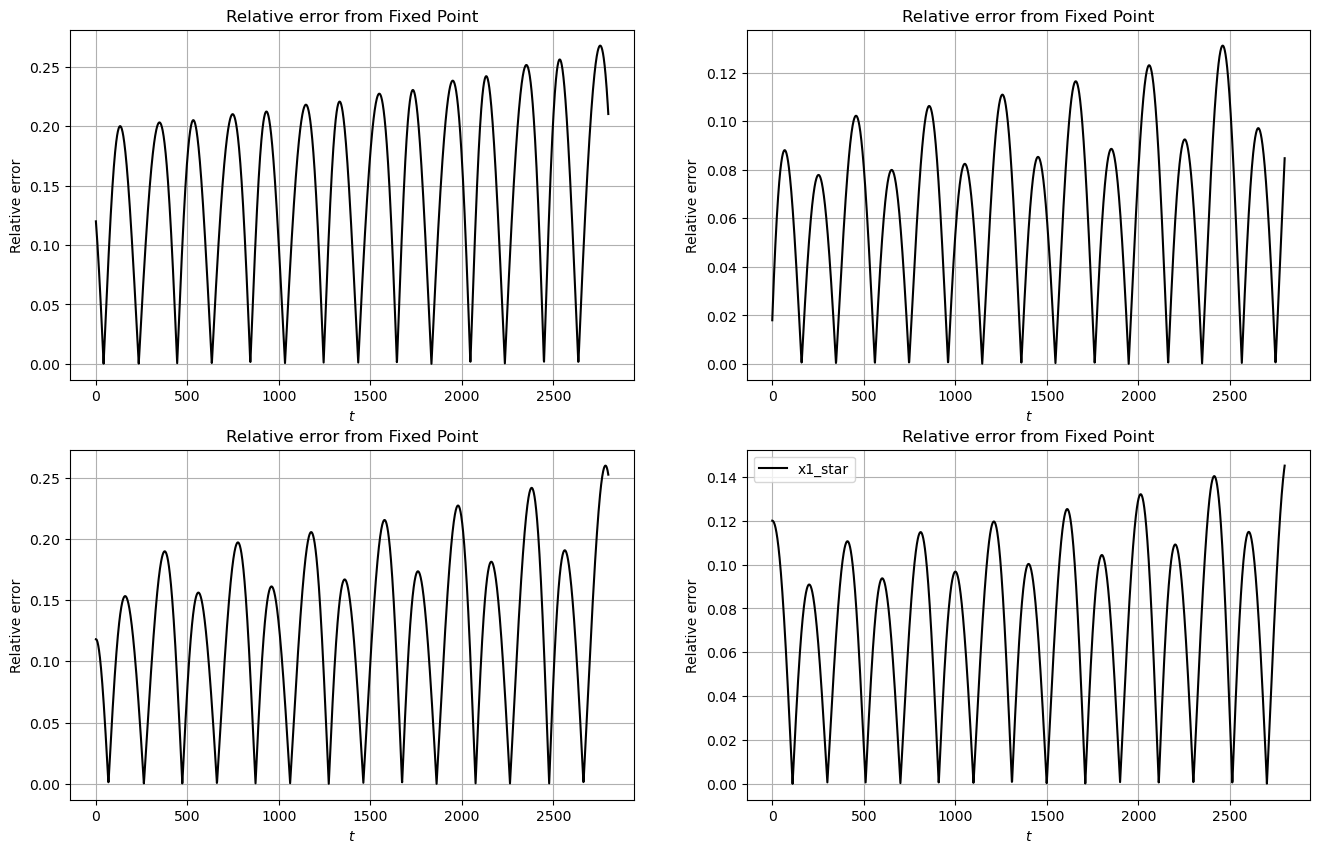

In [11]:
#Error analysis
print('P4-D: Asymptotic Error Analysis')
print('Due to the sustained oscillations of the system the relative error with respect to the fixed point never decays and keeps on oscillating.')
rel_err_x1 = numpy.abs(solution_M2_sub_oscill2.y[0]-solution_eqmb[0])/numpy.abs(solution_eqmb[0])
rel_err_xd = numpy.abs(solution_M2_sub_oscill2.y[1]-solution_eqmb[1])/numpy.abs(solution_eqmb[0])
rel_err_ya = numpy.abs((a_M2_sub-solution_M2_sub_oscill2.y[0]-solution_M2_sub_oscill2.y[1])-(a_M2_sub-solution_eqmb[0]-solution_eqmb[1]))/numpy.abs(a_M2_sub-solution_eqmb[0]-solution_eqmb[1])
rel_err_x1_star = numpy.abs(solution_M2_sub_oscill2.y[2]-solution_eqmb[2])/numpy.abs(solution_eqmb[2])

figure8_M2sub = plt.figure(figsize=(16,10))
axes = figure8_M2sub.add_subplot(2,2,1)
axes.plot(solution_M2_sub_oscill2.t, rel_err_x1, 'k', label='x1')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')

axes = figure8_M2sub.add_subplot(2,2,2)
axes.plot(solution_M2_sub_oscill2.t, rel_err_xd, 'k', label='xd')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')

axes = figure8_M2sub.add_subplot(2,2,3)
axes.plot(solution_M2_sub_oscill2.t, rel_err_ya, 'k', label='ya')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')

axes = figure8_M2sub.add_subplot(2,2,4)
axes.plot(solution_M2_sub_oscill2.t, rel_err_x1_star, 'k', label='x1_star')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')
axes.legend()
plt.show()

### P5: Complete Model with Time delay (M2) ### 

P5-A: Transient Analysis
The results for the M2 model, Fig 15 in [1], are validated (atelast from visual inspection) from the plots given below
Sustained oscillations are observed even for a time-lag of 70 years which in the case of M2_sub model produced damped oscillating behaviour.
The Time Period period of oscillations of atmospheric carbon content (ya) is = 700.0 years consistent with the findings from [1].


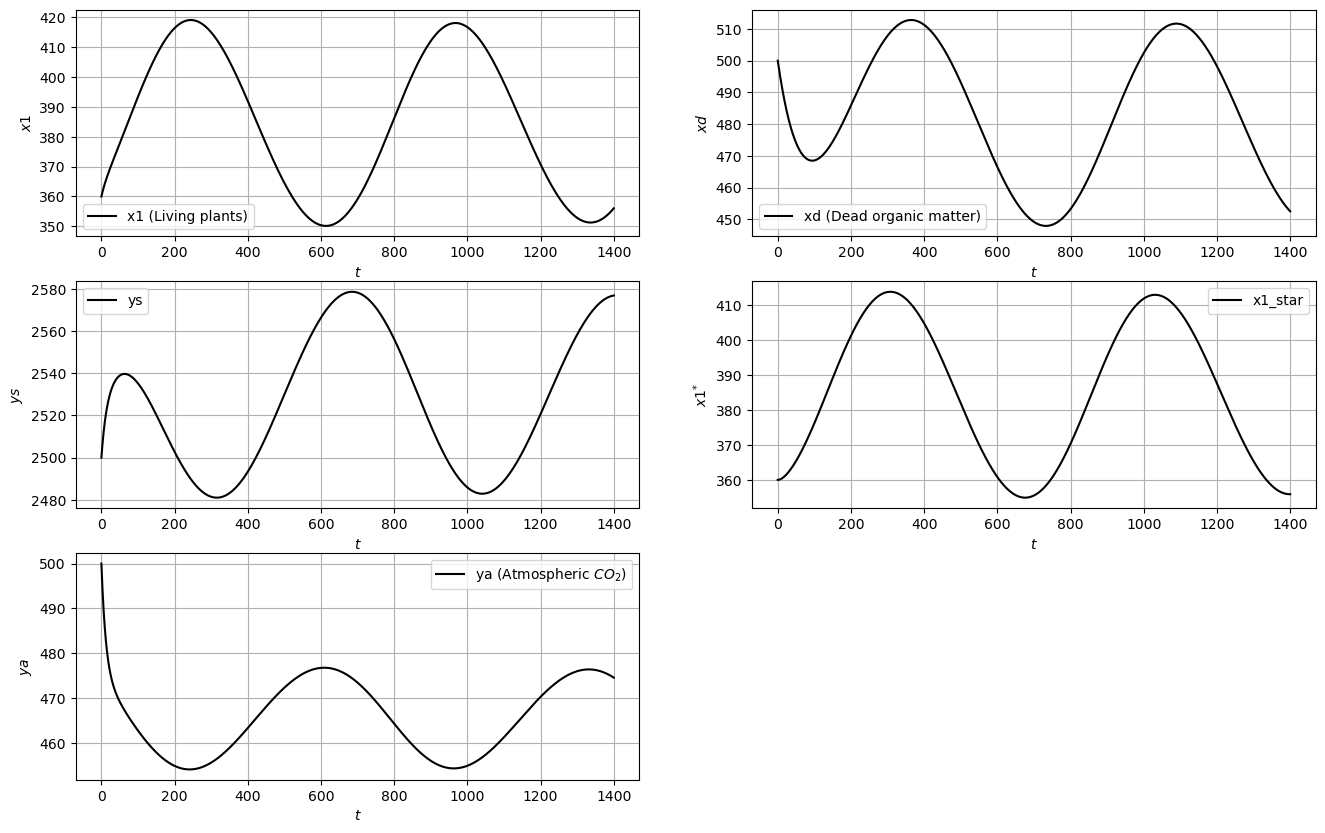

In [12]:
#Parameters extracted from [1]
k1_M2 = 4.3e-5 
k2_M2 = 2e-2
k3_M2 = 1.6e-2
k4_M2 = 6e-2
k5_M2 = 1.84e-1
tau_M2 = 70

def carbon_cycle_M2(t, variables):
    """
    Build M2 model

    Args:
    t: ndarray
        time-sample array
    variables: tuple
        dependent variables of the dynamical system
    parameters: tuple
        parameters and/or constants within the dynamical system
    
    Returns:
    M2: list
        The time derivates of dependent variables
    """
    x1, xd, ys, x1_star = variables

    dx1_dt = k1_M2 * x1 * (a_M2 - x1 - xd - ys) - (k2_M2 * x1_star)
    dxd_dt = (k2_M2 * x1_star) - (k3_M2 * xd)
    dys_dt = k4_M2 * ((a_M2 - x1 - xd - ys) - (k5_M2 * ys))
    dx1_star_dt = (1/tau_M2)*(x1-x1_star)
    M2 = [dx1_dt, dxd_dt, dys_dt, dx1_star_dt]

    return M2

def jacobian_M2(state, params):

    """ 
    Calculate the Jacobian Matrix for M2 model

    args:
    state: tuple 
        dependent variables of M2
    params: tuple
        M2 parameters

    returns: numpy array
        Jacobian of M2
    """
    x1, xd, ys, x1_star = state
    k1, k2, k3, k4, k5, tau, a = params

    df1_dx1 = -k1 * x1 + k1 * (a - x1 - xd - ys)
    df1_dxd = -k1 * x1
    df1_dys = -k1 * x1
    df1_dx1_star = -k2

    df2_dx1 = 0
    df2_dxd = -k3
    df2_dys = 0
    df2_dx1_star = k2

    df3_dx1 = -k4
    df3_dxd = -k4
    df3_dys = k4 * (-k5 - 1)
    df3_dx1_star = 0

    df4_dx1 = 1 / tau
    df4_dxd = 0
    df4_dys = 0
    df4_dx1_star = -1 / tau

    return numpy.array([
        [df1_dx1, df1_dxd, df1_dys, df1_dx1_star],
        [df2_dx1, df2_dxd, df2_dys, df2_dx1_star],
        [df3_dx1, df3_dxd, df3_dys, df3_dx1_star],
        [df4_dx1, df4_dxd, df4_dys, df4_dx1_star]
    ])

def equations_M2(vars_inp):

    """
    Formulate fixed-point equations for M2

    args: 
    vars_inp: tuple
        variables for fixed-point equations

    returns: list
        fixed-point equations for M2
    """

    x1, xd, ys, x1_star = vars_inp
    eq1 = k1_M2 * x1 * (a_M2 - x1 - xd - ys) - (k2_M2 * x1_star)
    eq2 = (k2_M2 * x1_star) - (k3_M2 * xd)
    eq3 = k4_M2 * ((a_M2 - x1 - xd - ys) - (k5_M2 * ys))
    eq4 = (1/tau_M2)*(x1-x1_star)
    return [eq1, eq2, eq3, eq4]


#Initial Conditions
gap = 0
x10_M2 = 360
xd0_M2 = 500
ys0_M2 = 2500
x1_star0_M2 = 360
initial_conditions = [x10_M2, xd0_M2, ys0_M2, x1_star0_M2]
y_a0_M2 = 500 
a_M2 = numpy.sum(initial_conditions[:-1]) + y_a0_M2 + gap

t_end = 1400
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)
solution_M2 = solve_ivp(carbon_cycle_M2, t_span, initial_conditions, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

print('P5-A: Transient Analysis')
print('The results for the M2 model, Fig 15 in [1], are validated (atelast from visual inspection) from the plots given below')
print('Sustained oscillations are observed even for a time-lag of 70 years which in the case of M2_sub model produced damped oscillating behaviour.')
period = find_period(a_M2-solution_M2.y[0]-solution_M2.y[1]-solution_M2.y[2])
print("The Time Period period of oscillations of atmospheric carbon content (ya) is = %s years consistent with the findings from [1]."%(period))

#2-D Plots
figure1_M2 = plt.figure(figsize=(16,10))
axes = figure1_M2.add_subplot(3,2,1)
axes.plot(solution_M2.t, solution_M2.y[0], 'k', label='x1 (Living plants)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.legend()

axes = figure1_M2.add_subplot(3,2,2)
axes.plot(solution_M2.t, solution_M2.y[1], 'k', label='xd (Dead organic matter)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.legend()

axes = figure1_M2.add_subplot(3,2,3)
axes.plot(solution_M2.t, solution_M2.y[2], 'k', label='ys')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ys$')
axes.legend()

axes = figure1_M2.add_subplot(3,2,4)
axes.plot(solution_M2.t, solution_M2.y[3], 'k', label='x1_star')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.legend()

axes = figure1_M2.add_subplot(3,2,5)
axes.plot(solution_M2.t, a_M2-solution_M2.y[0]-solution_M2.y[1]-solution_M2.y[2], 'k', label='ya (Atmospheric $CO_{2}$)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ya$')
axes.legend()
plt.show()




P5-B: Fixed Point Estimation
1. Non-trivial Fixed Point by Analytical calculation: x1 = 385.3679361869454, xd = 481.70992023368177, ys = 2527.8058645096057 and x1_star = 385.3679361869454 
2. Non-trivial Fixed Point by scipy.optimize.fsolve (Initial guess = [300, 300, 2000, 300]): x1 = 385.3679361869455, xd = 481.7099202336819, ys = 2527.8058645096057 and x1_star = 385.3679361869455 
Fixed Point values validated! Success!


P5-C: Stability analysis of Fixed Points
Eigenvalues of the Jacobian for the non-trivial fixed point are: (-0.08285247710132733+0j), (-5.3762956909126296e-05+0.008719124607673677j), (-5.3762956909126296e-05-0.008719124607673677j)
A thing to note here is that the complex-conjugate eigenvalues for the non-trivial fixed point have real parts of the order of 5e-5 i.e. nearly zero..
It is known from empirical analysis [2] that a fixed point with purely imaginary eigenvalues acts like a center, around which the system revolves. This is a possible inference about the stabi

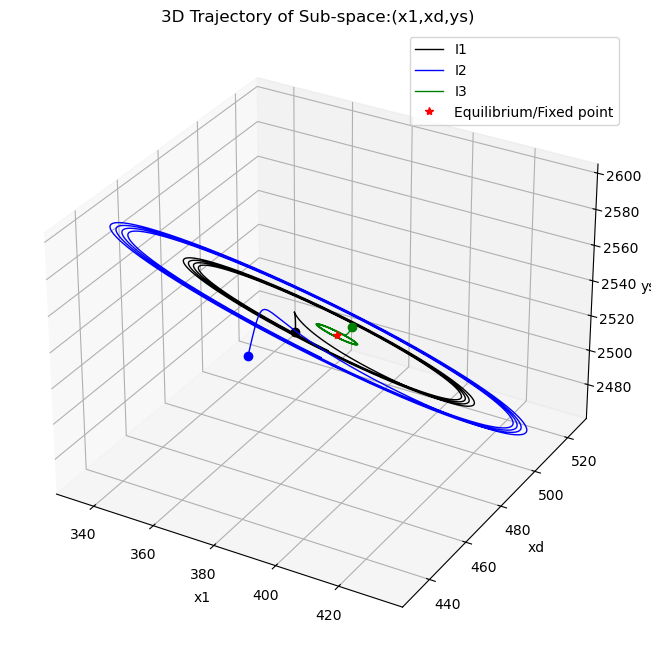

In [13]:
#Fixed Point Stability Analysis 
print('P5-B: Fixed Point Estimation')
#Fixed Points using scipy-optimize-fsolve
initial_guess = [300, 300, 2000, 300]
solution_eqmbM2 = fsolve(equations_M2, initial_guess)

#Analytical calculaiton of Fixed Points
numerator = k3_M2 * (a_M2 * k1_M2 * k5_M2 - k2_M2 * k5_M2 - k2_M2)
denominator = k1_M2 * k5_M2 * (k2_M2 + k3_M2)
x1_e = numerator / denominator
xd_e = k2_M2 * numerator / (k3_M2* denominator)
ys_e = k2_M2 / (k1_M2 * k5_M2)
x1_star_e = numerator / denominator
ys_e = k2_M2 / (k1_M2 * k5_M2)

print('1. Non-trivial Fixed Point by Analytical calculation: x1 = %s, xd = %s, ys = %s and x1_star = %s '%(x1_e,xd_e,ys_e,x1_star_e))
print('2. Non-trivial Fixed Point by scipy.optimize.fsolve (Initial guess = [300, 300, 2000, 300]): x1 = %s, xd = %s, ys = %s and x1_star = %s '%(solution_eqmbM2[0],solution_eqmbM2[1],solution_eqmbM2[2],solution_eqmbM2[3]))
numpy.testing.assert_allclose((x1_e, xd_e, ys_e, x1_star_e), (solution_eqmbM2[0], solution_eqmbM2[1], solution_eqmbM2[2], solution_eqmbM2[3]), rtol=1.e-2, atol=1.e-3)
print('Fixed Point values validated! Success!')

#Linearization and Stability analysis of Fixed Points
print('\n')
print('P5-C: Stability analysis of Fixed Points')
J = jacobian_M2((solution_eqmbM2[0],solution_eqmbM2[1],solution_eqmbM2[2],solution_eqmbM2[3]),(k1_M2, k2_M2, k3_M2, k4_M2, k5_M2, tau_M2, a_M2))
print('Eigenvalues of the Jacobian for the non-trivial fixed point are: %s, %s, %s'%(numpy.linalg.eigvals(J)[0],numpy.linalg.eigvals(J)[1],numpy.linalg.eigvals(J)[2]))
print('A thing to note here is that the complex-conjugate eigenvalues for the non-trivial fixed point have real parts of the order of 5e-5 i.e. nearly zero..')
print('It is known from empirical analysis [2] that a fixed point with purely imaginary eigenvalues acts like a center, around which the system revolves. This is a possible inference about the stability of the non-trivial fixed point.')


#3D subspace trajectory
print('\n')
print('The 3D plot given below depicts the time evolution of the subspace of the system (x1,xd,ys) for three different inital states I1, I2 and I3.')
print('The rationale behind choosing the subspace was two-fold: one that the grand system (barring x1_star which behaves similar to x1) is 4-Dimensional and hence it was imperative to select a 3-D subspace and second that the sea (ys) is the new contributor in M2 model which ought to be discussed')
print('A similar observation is noted that the system continues to move in cycles around the fixed point')
print('')
t_end = 3000
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)

gap = 0
x10_M2 = 360
xd0_M2 = 500
ys0_M2 = 2500
x1_star0_M2 = 360
initial_conditions1 = [x10_M2, xd0_M2, ys0_M2, x1_star0_M2]
y_a0_M2 = 500 
a_M2 = numpy.sum(initial_conditions1[:-1]) + y_a0_M2 + gap
solution_M2_1 = solve_ivp(carbon_cycle_M2, t_span, initial_conditions1, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

gap = 0
deflect = 10
x10_M2 = 360 - deflect
xd0_M2 = 500 - deflect
ys0_M2 = 2500 - deflect
x1_star0_M2 = 360 - deflect
initial_conditions2 = [x10_M2, xd0_M2, ys0_M2, x1_star0_M2]
solution_M2_2 = solve_ivp(carbon_cycle_M2, t_span, initial_conditions2, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

gap = 0
deflect = 3
x10_M2 = solution_eqmbM2[0] + deflect
xd0_M2 = solution_eqmbM2[1] + deflect
ys0_M2 = solution_eqmbM2[2] + deflect
x1_star0_M2 = solution_eqmbM2[3] + deflect
initial_conditions3 = [x10_M2, xd0_M2, ys0_M2, x1_star0_M2]
solution_M2_3 = solve_ivp(carbon_cycle_M2, t_span, initial_conditions3, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

figure2_M2  = plt.figure(figsize=(10,8))
ax = figure2_M2.add_subplot(111, projection='3d')
ax.plot(solution_M2_1.y[0], solution_M2_1.y[1], solution_M2_1.y[2], 'k', label='I1', lw=1)
ax.plot(solution_M2_1.y[0][0], solution_M2_1.y[1][0], solution_M2_1.y[2][0], 'ko')
ax.plot(solution_M2_2.y[0], solution_M2_2.y[1], solution_M2_2.y[2], 'b', label='I2', lw=1)
ax.plot(solution_M2_2.y[0][0], solution_M2_2.y[1][0], solution_M2_2.y[2][0], 'bo')
ax.plot(solution_M2_3.y[0], solution_M2_3.y[1], solution_M2_3.y[2], 'g', label='I3', lw=1)
ax.plot(solution_M2_3.y[0][0], solution_M2_3.y[1][0], solution_M2_3.y[2][0], 'go')
ax.plot(solution_eqmbM2[0], solution_eqmbM2[1], solution_eqmbM2[2], 'r*',label='Equilibrium/Fixed point')
ax.set_title("3D Trajectory of Sub-space:(x1,xd,ys)")
ax.set_xlabel('x1')
ax.set_ylabel('xd')
ax.set_zlabel('ys')
ax.legend()
plt.show()

P5-A: Asymptotic error analysis
Due to the sustained oscillations of the system the relative error with respect to the fixed point never decays and keeps on oscillating.


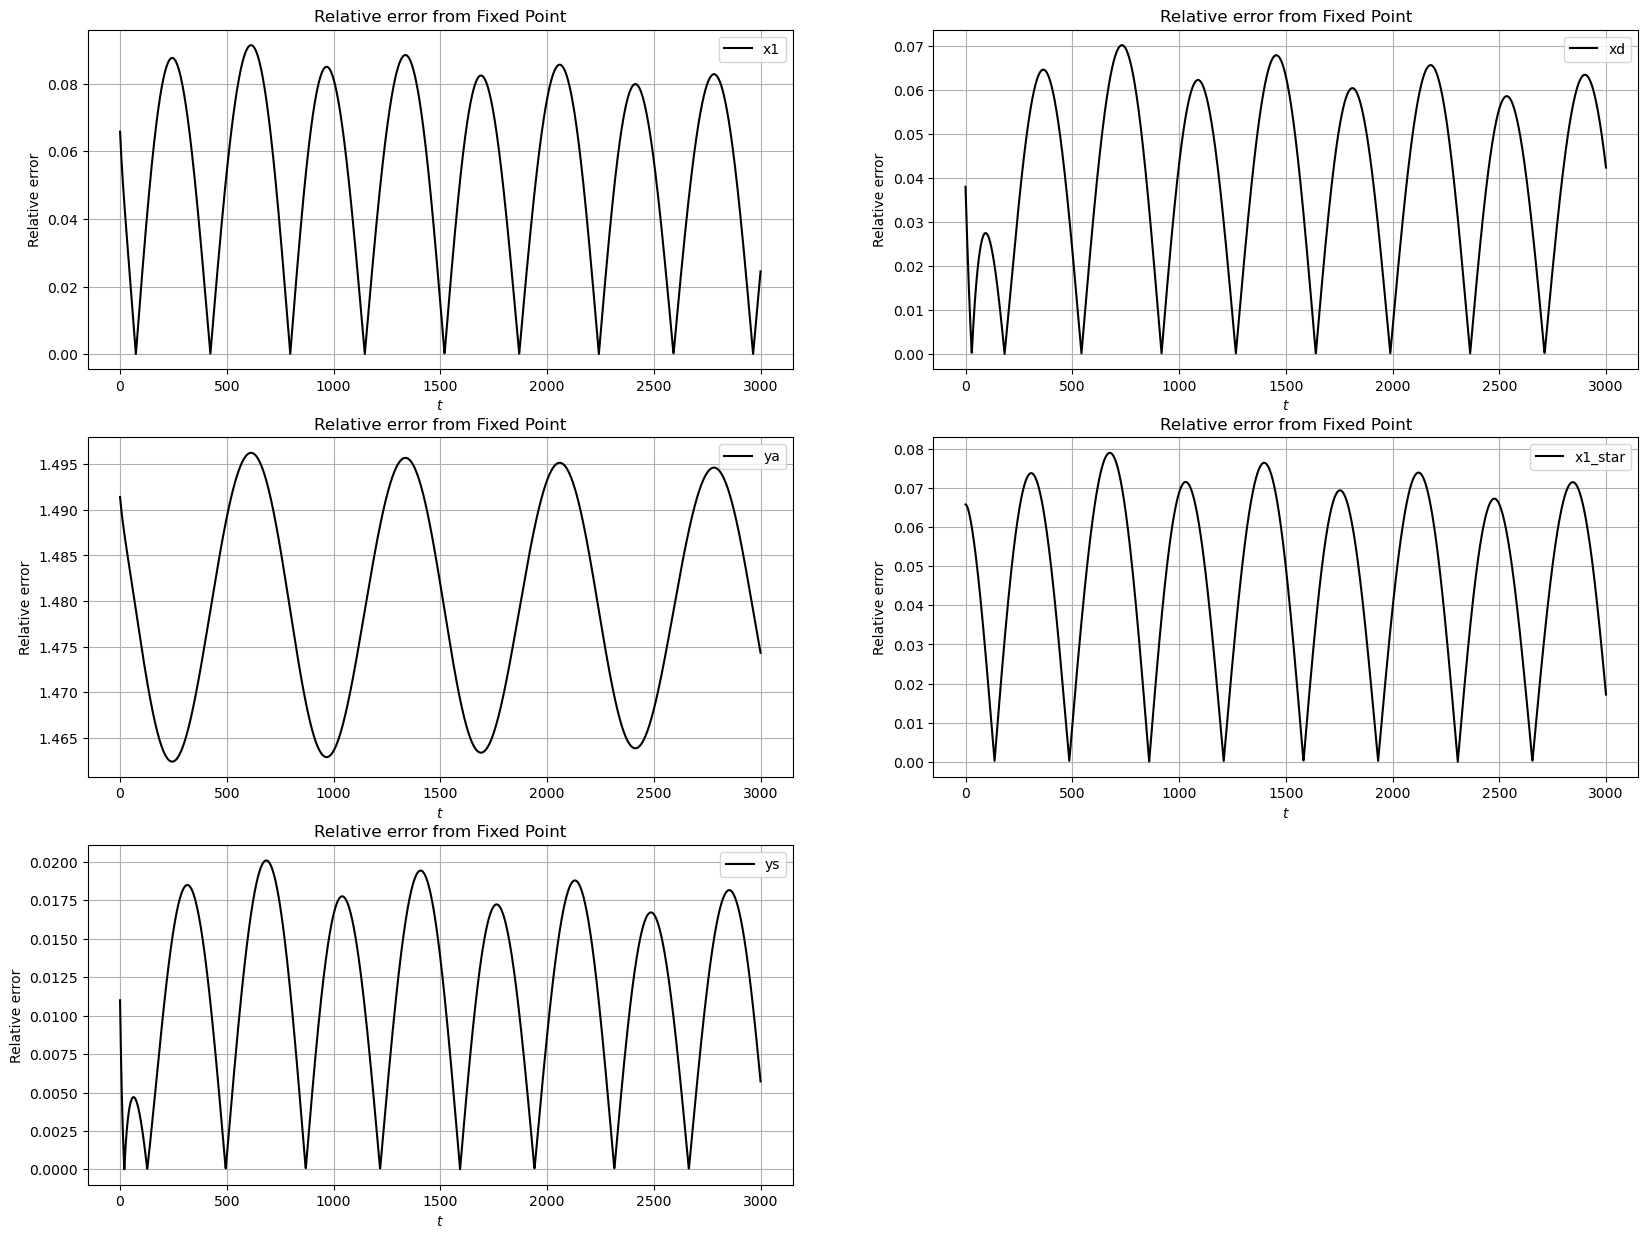

In [14]:
#Error analysis
t_end = 3000
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)

#Initial Conditions
gap = 0
x10_M2 = 360
xd0_M2 = 500
ys0_M2 = 2500
x1_star0_M2 = 360
initial_conditions = [x10_M2, xd0_M2, ys0_M2, x1_star0_M2]
y_a0_M2 = 500 
a_M2 = numpy.sum(initial_conditions[:-1]) + y_a0_M2 + gap
solution_M2 = solve_ivp(carbon_cycle_M2, t_span, initial_conditions, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

print('P5-A: Asymptotic error analysis')
print('Due to the sustained oscillations of the system the relative error with respect to the fixed point never decays and keeps on oscillating.')
rel_err_x1 = numpy.abs(solution_M2.y[0]-solution_eqmbM2[0])/numpy.abs(solution_eqmbM2[0])
rel_err_xd = numpy.abs(solution_M2.y[1]-solution_eqmbM2[1])/numpy.abs(solution_eqmbM2[1])
rel_err_ya = numpy.abs((a_M2_sub-solution_M2.y[0]-solution_M2.y[1]--solution_M2.y[1])-(a_M2_sub-solution_eqmbM2[0]-solution_eqmbM2[1]-solution_eqmbM2[2]))/numpy.abs(a_M2_sub-solution_eqmbM2[0]-solution_eqmbM2[1]-solution_eqmbM2[2])
rel_err_x1_star = numpy.abs(solution_M2.y[3]-solution_eqmbM2[3])/numpy.abs(solution_eqmbM2[3])
rel_err_ys = numpy.abs(solution_M2.y[2]-solution_eqmbM2[2])/numpy.abs(solution_eqmbM2[2])

figure9_M2sub = plt.figure(figsize=(20,15))
axes = figure9_M2sub.add_subplot(3,2,1)
axes.plot(solution_M2.t, rel_err_x1, 'k', label='x1')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')
axes.legend()

axes = figure9_M2sub.add_subplot(3,2,2)
axes.plot(solution_M2.t, rel_err_xd, 'k', label='xd')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')
axes.legend()

axes = figure9_M2sub.add_subplot(3,2,3)
axes.plot(solution_M2.t, rel_err_ya, 'k', label='ya')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')
axes.legend()

axes = figure9_M2sub.add_subplot(3,2,4)
axes.plot(solution_M2.t, rel_err_x1_star, 'k', label='x1_star')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')
axes.legend()

axes = figure9_M2sub.add_subplot(3,2,5)
axes.plot(solution_M2.t, rel_err_ys, 'k', label='ys')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('Relative error')
axes.set_title('Relative error from Fixed Point')
axes.legend()
plt.show()

### P6: Advanced Complete Model with Time delay (M2_pro) ###

P6: 2D Transient Analysis
The results for the M2_pro model, Fig 17 in [1], are validated (atelast from visual inspection) from the plots given below
It is observed that CO2 in the biosphere increases with time but that in the atmosphere (as well as the sea) does not show such a trend.
This is counter-intuitive since we `feel` that continuous burning of fossil carbon should contribute to hightened levels of atmospheric CO2. However it might be instructive to repeat this transient analysis over a parametric sweep on the space of q values, as is done in the next part.


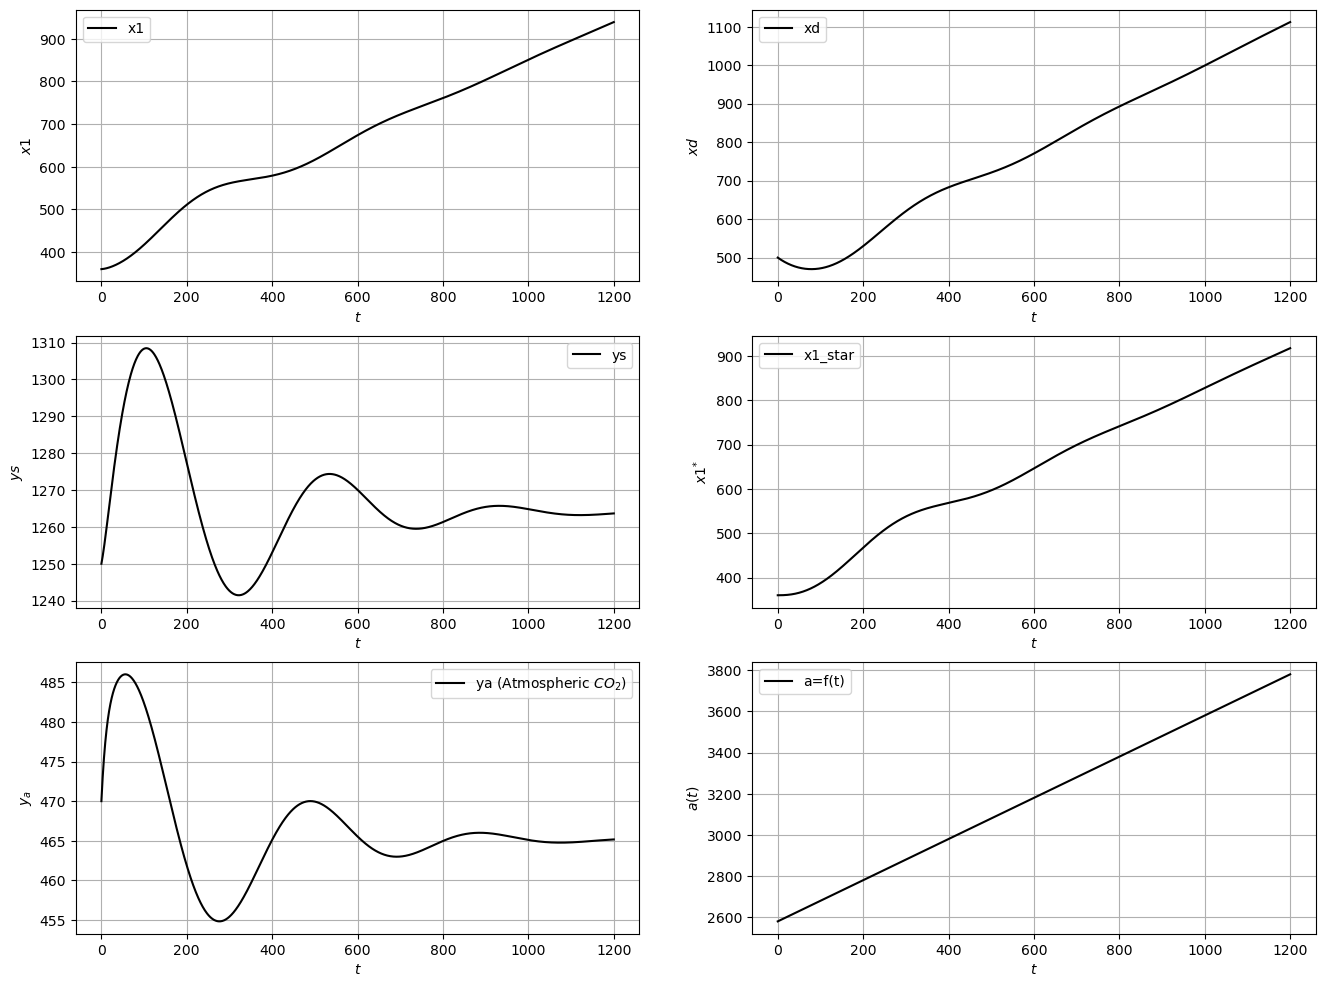

In [15]:
#Parameters extracted from [1]
k1_M2_pro = 4.3e-5
k2_M2_pro = 2e-2
k3_M2_pro = 1.6e-2
k4_M2_pro = 6e-2
k5_M2_pro = 0.368
tau_M2_pro = 50
q = 1

def carbon_cycle_M2_pro(t, variables):
    """
    Build M2_pro model

    Args:
    t: ndarray
        time-samples array
    variables: tuple
        dependent variables of the dynamical system
    parameters: tuple
        parameters and/or constants within the dynamical system
    
    Returns:
    M2: list
        The time derivates of dependent variables
    """
    x1, xd, ys, x1_star = variables

    a_t = a_M2_pro + q*t
    dx1_dt = k1_M2_pro * x1 * (a_t - x1 - xd - ys) - (k2_M2_pro * x1_star)
    dxd_dt = (k2_M2_pro * x1_star) - (k3_M2_pro * xd)
    dys_dt = k4_M2_pro * ((a_t - x1 - xd - ys) - (k5_M2_pro * ys))
    dx1_star_dt = (1/tau_M2_pro)*(x1-x1_star)
    M2_pro = [dx1_dt, dxd_dt, dys_dt, dx1_star_dt]

    return M2_pro


#Initial Conditions extracted from [1]
gap = 0
x10_M2_pro = 360
xd0_M2_pro = 500
ys0_M2_pro = 1250
x1_star0_M2_pro = 360
initial_conditions = [x10_M2_pro, xd0_M2_pro, ys0_M2_pro, x1_star0_M2_pro]
y_a0_M2_pro = 470 
a_M2_pro = numpy.sum(initial_conditions[:-1]) + y_a0_M2_pro + gap

t_end = 1200
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)
solution_M2_pro = solve_ivp(carbon_cycle_M2_pro, t_span, initial_conditions, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15)

#2-D Transient Analysis
print('P6: 2D Transient Analysis')
print('The results for the M2_pro model, Fig 17 in [1], are validated (atelast from visual inspection) from the plots given below')
print('It is observed that CO2 in the biosphere increases with time but that in the atmosphere (as well as the sea) does not show such a trend.')
print('This is counter-intuitive since we `feel` that continuous burning of fossil carbon should contribute to hightened levels of atmospheric CO2. However it might be instructive to repeat this transient analysis over a parametric sweep on the space of q values, as is done in the next part.')
figure1_M2_pro = plt.figure(figsize=(16,12))
axes = figure1_M2_pro.add_subplot(3,2,1)
axes.plot(solution_M2_pro.t, solution_M2_pro.y[0], 'k', label='x1')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.legend()

axes = figure1_M2_pro.add_subplot(3,2,2)
axes.plot(solution_M2_pro.t, solution_M2_pro.y[1], 'k', label='xd')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.legend()

axes = figure1_M2_pro.add_subplot(3,2,3)
axes.plot(solution_M2_pro.t, solution_M2_pro.y[2], 'k', label='ys')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ys$')
axes.legend()

axes = figure1_M2_pro.add_subplot(3,2,4)
axes.plot(solution_M2_pro.t, solution_M2_pro.y[3], 'k', label='x1_star')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.legend()

axes = figure1_M2_pro.add_subplot(3,2,5)
axes.plot(solution_M2_pro.t, (a_M2_pro+q*solution_M2_pro.t)-solution_M2_pro.y[0]-solution_M2_pro.y[1]-solution_M2_pro.y[2], 'k', label='ya (Atmospheric $CO_{2}$)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$y_{a}$')
axes.legend()

axes = figure1_M2_pro.add_subplot(3,2,6)
axes.plot(solution_M2_pro.t, (a_M2_pro+q*solution_M2_pro.t), 'k', label='a=f(t)')
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$a(t)$')
axes.legend()
plt.show()

P6: 2D Transient Analysis: Parameter Sweep on q-space
It is observed from the plots below that, as q (the rate of fossil carbon consumption) increases, more CO2 is taken up by the biosphere (x1 and xd) and even the sea (ys).
The atmospheric CO2 however does not seem to rise. This aligns partially with the conclusion drawn in the previous exercise, except for the increase observed in the evolution of ys.
Note: The legend in each of the plots denotes various values of q (the rate of combustion of fossil carbon)


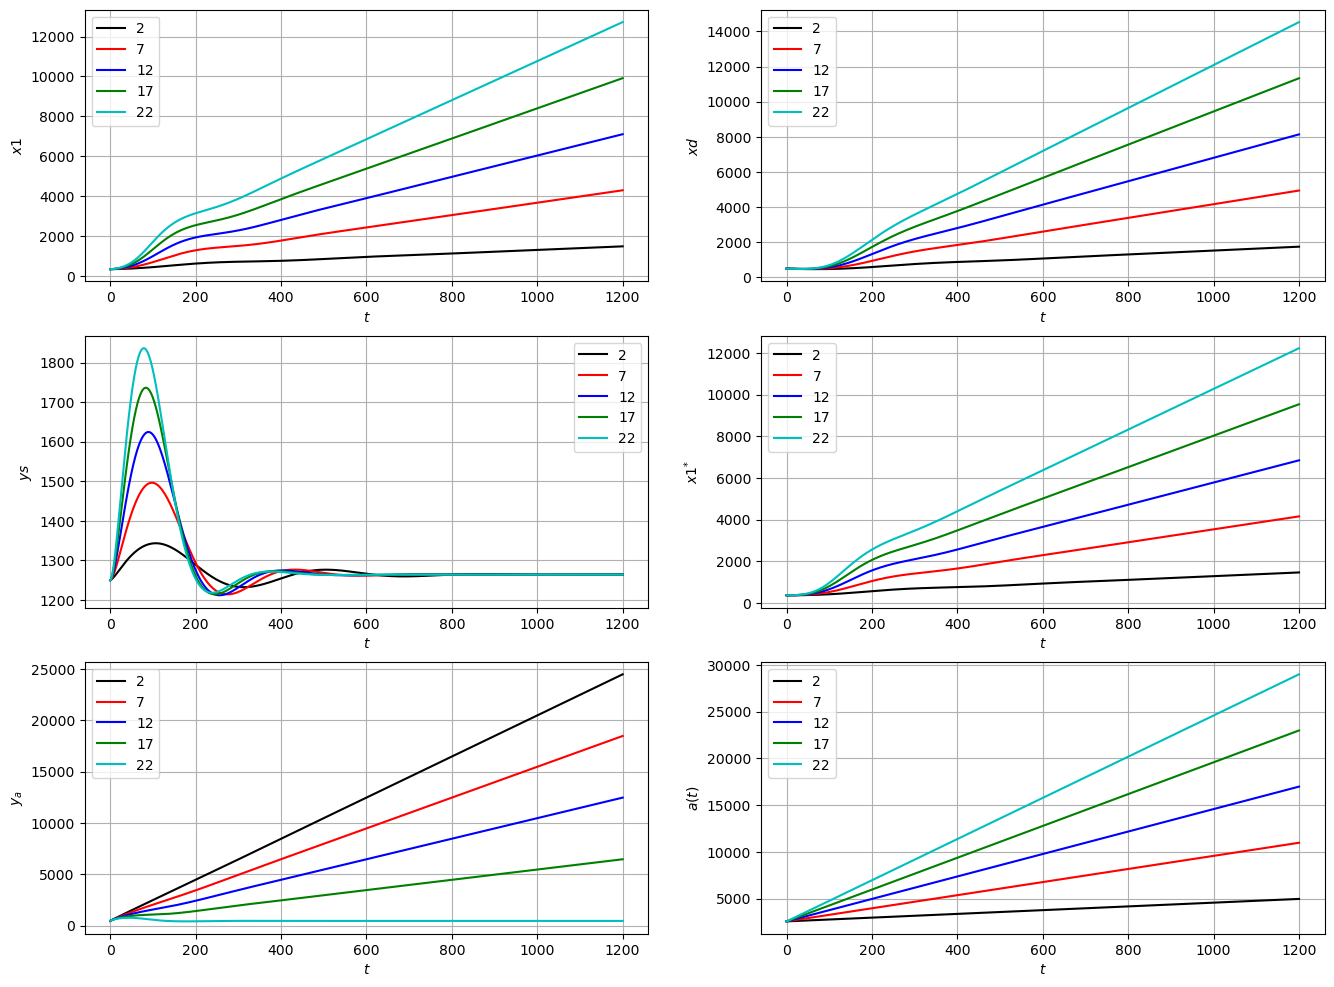

In [16]:
#Parameter Sweep on q-space
#Parameters extracted from [1]
k1_M2_pro = 4.3e-5
k2_M2_pro = 2e-2
k3_M2_pro = 1.6e-2
k4_M2_pro = 6e-2
k5_M2_pro = 0.368
tau_M2_pro = 50

def carbon_cycle_M2_pro(t, variables):
    """
    Build M2_pro model

    Args:
    t: ndarray
        time-samples array
    variables: tuple
        dependent variables of the dynamical system
    parameters: tuple
        parameters and/or constants within the dynamical system
    
    Returns:
    M2: list
        The time derivates of dependent variables
    """
    x1, xd, ys, x1_star = variables

    a_t = a_M2_pro + q*t
    dx1_dt = k1_M2_pro * x1 * (a_t - x1 - xd - ys) - (k2_M2_pro * x1_star)
    dxd_dt = (k2_M2_pro * x1_star) - (k3_M2_pro * xd)
    dys_dt = k4_M2_pro * ((a_t - x1 - xd - ys) - (k5_M2_pro * ys))
    dx1_star_dt = (1/tau_M2_pro)*(x1-x1_star)
    M2_pro = [dx1_dt, dxd_dt, dys_dt, dx1_star_dt]

    return M2_pro


#Initial Conditions extracted from [1]
gap = 0
x10_M2_pro = 360
xd0_M2_pro = 500
ys0_M2_pro = 1250
x1_star0_M2_pro = 360
initial_conditions = [x10_M2_pro, xd0_M2_pro, ys0_M2_pro, x1_star0_M2_pro]
y_a0_M2_pro = 470 
a_M2_pro = numpy.sum(initial_conditions[:-1]) + y_a0_M2_pro + gap

t_end = 1200
t_span = (0, t_end)
t_eval = numpy.linspace(t_span[0], t_span[1], t_end)

solution_M2_pro_list = []
color_M2_pro_list = ['k','r','b','g','c']
q_list = [2,7,12,17,22]

for q in q_list:
    solution_M2_pro_list.append(solve_ivp(carbon_cycle_M2_pro, t_span, initial_conditions, method= 'RK45', t_eval=t_eval ,rtol=1e-8, atol=1e-15))

#2-D Transient Analysis
print('P6: 2D Transient Analysis: Parameter Sweep on q-space')
print('It is observed from the plots below that, as q (the rate of fossil carbon consumption) increases, more CO2 is taken up by the biosphere (x1 and xd) and even the sea (ys).')
print('The atmospheric CO2 however does not seem to rise. This aligns partially with the conclusion drawn in the previous exercise, except for the increase observed in the evolution of ys.')
print('Note: The legend in each of the plots denotes various values of q (the rate of combustion of fossil carbon)')
figure2_M2_pro = plt.figure(figsize=(16,12))
axes = figure2_M2_pro.add_subplot(3,2,1)
for idx,solution_M2_pro in enumerate(solution_M2_pro_list):
    axes.plot(solution_M2_pro.t, solution_M2_pro.y[0], color=color_M2_pro_list[idx] , label=q_list[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1$')
axes.legend()

axes = figure2_M2_pro.add_subplot(3,2,2)
for idx,solution_M2_pro in enumerate(solution_M2_pro_list):
    axes.plot(solution_M2_pro.t, solution_M2_pro.y[1], color=color_M2_pro_list[idx] , label=q_list[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$xd$')
axes.legend()

axes = figure2_M2_pro.add_subplot(3,2,3)
for idx,solution_M2_pro in enumerate(solution_M2_pro_list):
    axes.plot(solution_M2_pro.t, solution_M2_pro.y[2], color=color_M2_pro_list[idx] , label=q_list[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$ys$')
axes.legend()

axes = figure2_M2_pro.add_subplot(3,2,4)
for idx,solution_M2_pro in enumerate(solution_M2_pro_list):
    axes.plot(solution_M2_pro.t, solution_M2_pro.y[3], color=color_M2_pro_list[idx] , label=q_list[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$x1^{*}$')
axes.legend()

axes = figure2_M2_pro.add_subplot(3,2,5)
for idx,solution_M2_pro in enumerate(solution_M2_pro_list):
    axes.plot(solution_M2_pro.t, (a_M2_pro+q*solution_M2_pro.t)-solution_M2_pro.y[0]-solution_M2_pro.y[1]-solution_M2_pro.y[2], color=color_M2_pro_list[idx] , label=q_list[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$y_{a}$')
axes.legend()

axes = figure2_M2_pro.add_subplot(3,2,6)
for idx,solution_M2_pro in enumerate(solution_M2_pro_list):
    axes.plot(solution_M2_pro.t, (a_M2_pro+q_list[idx]*solution_M2_pro.t),  color=color_M2_pro_list[idx] , label=q_list[idx])
axes.grid()
axes.set_xlabel('$t$')
axes.set_ylabel('$a(t)$')
axes.legend()
plt.show()

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you might do to fix it.


The following conclusions drawn in [1] were verified in this project:
1. The atmosphere-biosphere carbon-cycle model (M2_sub​) has two equilibrium (fixed) points: one unstable trivial point and one stable non-trivial point. The non-trivial fixed point may lose absolute stability if there is a significant time lag in the biosphere. 
2. A large time lag in the biosphere introduces sustained oscillations in the model (M2_sub).
3. The sea does not cause instability but acts as a damping factor in the absence of biospheric time lag (model M1). However, in the presence of a time lag in the biosphere, sustained oscillations are observed (model M2).
4. The injection of additional carbon dioxide at a rate corresponding to fossil carbon combustion leads to a severe increase in biospheric carbon dioxide levels, while atmospheric carbon dioxide levels remain unaffected.

The primary aim of this project was to faithfully reproduce the numerical and qualitative results from [1], which formulates a mathematical model of the carbon cycle. I believe this aim was achieved to a considerable extent. This assertion is primarily supported by the visual comparison of time-evolution plots presented in [1] and those generated in this project. However, a thorough quantitative investigation is required to make a more definitive claim. To address this, I have included test cases and error convergence plots for various sections of the project:
1. Test cases were formulated to verify the correctness of the fixed points.
2. Error convergence plots were used to evaluate the asymptotic stability of these fixed points.
3. Additionally, three-dimensional plots describing the trajectory of the (sub)system were generated for various initial conditions. These plots confirm the inferences drawn from eigenvalue analysis of the corresponding linearized system.

Despite the successful reproduction of key results, a couple of inconsistencies were noted:
1. Threshold Time Lag: While [1] reports the threshold time lag as "around 100 years," this project estimates it numerically as 119 years. This discrepancy could be due to [1] reporting an approximate value or an insufficient resolution in the parameter $k_4$​ used in P1.
2. Peak Differences in $x_{1}$ and $x_{d}$: A difference of 10 units was observed (visually) in the peaks of $x_{1}$ and $x_{d}$ in P6 in comparison to Fig.17 in [1]. A possible explanation could be the superior computational precision of SciPy compared to BESK, the computing tool used by the authors of [1] or absence of a grid on Fig.17 in [1].

Future Work:
1. **Modifying the Functional Relationships:**

Revising the functional forms of key interactions in the carbon-cycle model (e.g., functions f and g) to better represent dynamic interactions. This idea is inspired by the predator-prey problem, where modifications using Holling functional responses [3] improve realism. However, extensive data collection is necessary to validate such a model.

2. **Refining the Fossil Carbon Consumption Rate:**

Constructing a nonlinear version of $a(t) = a(0) + qt$ to better represent the rate of fossil carbon consumption. Since [1] was published in 1955, the rate of fossil carbon consumption has likely increased manifold. Incorporating a more realistic growth rate into the equation for $a$ (the total amount of carbon dioxide) could improve predictions for atmospheric $CO_{2}$ levels.

